# Coral Gables Data Analysis

In [ ]:
options(repos = c(CRAN = "https://cloud.r-project.org"))


library(languageserver)
library(rmarkdown)



Attaching package: 'rmarkdown'

The following object is masked from 'package:languageserver':

    run

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Loading required package: grid
ComplexHeatmap version 2.24.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))

Linking to GEOS 3.13.1, GDAL 3.11.0, PROJ 9.6.0; sf_use_s2() is TRUE

Loading required package: abind

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some

Loading required package: permute


Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: generics

Attaching package: 'generics'

The following object is masked from 'package:lubridate':

    as.difftime

The following object is masked from 'package:dplyr':

    explain

The following objects are masked from 'package:base':

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Attaching package: 'BiocGenerics'

The following object is masked from 'package:dplyr':

    combine

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, t

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: stats4
mi (Version 1.2, packaged: 2025-09-01 20:01:42 UTC; ben)
mi  Copyright (C) 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015 Trustees of Columbia University
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under the General Public License version 2 or later.
Execute RShowDoc('COPYING') for details.

Attaching package: 'mi'

The following object is masked from 'package:tidyr':

    complete


Attaching package: 'mice'

The following objects are masked from 'package:mi':

    complete, pool

The following objects are masked from 'package:BiocGenerics':

    cbind, rbind

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))

package 'FSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
    C:\Users\Robert.Bremer\AppData\Local\Temp\Rtmpk5E3tH\downloaded_packages

Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 
## FSA v0.10.1. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.

Attaching package: 'FSA'

The following object is masked from 'package:car':

    bootCase

package 'dataRetrieval' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
    C:\Users\Robert.Bremer\AppData\Local\Temp\Rtmpk5E3tH\downloaded_packages

Bioconductor version '3.21' is out-of-date; the current release version '3.22'
  is available with R version '4.5'; see https://bioconductor.org/install

Attaching package: 'BiocManager'

The following object is masked from 'package:mice':

    version

In [ ]:
old_cgw_mst <- read.csv("C:/Users/Robert.Bremer/Downloads/MARIBETH_Copy of CGWW_WQV Data logs final set_10-13-2021.xlsx - mEI Raw data.csv") %>%
  row_to_names(1) %>%
  clean_names() %>%
  select(-c(na)) %>%
  mutate(across(everything(), na_if, y="")) %>%
  drop_na(sample_collection_date) %>%
  drop_na(sample_site_description) %>%
  mutate(project_number = 1) %>%
  separate(sample_site_description, c("site","depth2"), sep = "_",remove=FALSE) %>%
  mutate(sample_collection_date = str_replace_all(sample_collection_date,"/","-")) %>%
  mutate(site = str_replace(site,"-",""))


ℹ In argument: `across(everything(), na_if, y = "")`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))

35, 70, 71, 72, 90, 91, 92, 104, 105, 106, 124, 125, 126, 144, 145, 146, ...].

 [1] X                                           
 [2] sample_collection_date                      
 [3] sample_site_description                     
 [4] site                                        
 [5] depth                                       
 [6] m_ei_plate_counts_100m_l_triplicate_number_1
 [7] m_ei_plate_counts_100m_l_triplicate_number_2
 [8] m_ei_plate_counts_100m_l_triplicate_number_3
 [9] average_m_ei_plate_counts_100m_l            
[10] e_coli_subsamples                           
[11] project_number                              
<0 rows> (or 0-length row.names)

ℹ In argument: `mei = as.numeric(coalesce(mei_plate_count_100ml,
  average_m_ei_plate_counts_100m_l))`.
Caused by warning:
! NAs introduced by coercion

ℹ In argument: `mtec = as.numeric(coalesce(mtec_plate_count_100ml,
  e_coli_subsamples))`.
Caused by warning:
! NAs introduced by coercion

   project_number site informal_depth verbatimEventDate
53              1  CG1        surface        2020-10-14

# 2021 Analysis

In [ ]:
nutrients2021 <- read_excel("C:/Users/Robert.Bremer/Downloads/CGW Nutrients and Chl-a_NOAA_submitted.xlsx") %>%
  clean_names() %>%
  separate(site, into = c("site", "inf_depth"), sep = "-") %>%
  mutate(inf_depth = tolower(inf_depth)) %>%
  mutate(collection_date = as.Date(collection_date)) %>%
  mutate(across(10:19, as.numeric)) %>%
  mutate(across(21:23, as.numeric)) %>%
  mutate(collection_date = as.Date(collection_date)) %>%
  mutate(
    season = case_when(
      month(collection_date) %in% c(12, 1, 2) ~ "winter",
      month(collection_date) %in% c(3, 4, 5)  ~ "spring",
      month(collection_date) %in% c(6, 7, 8)  ~ "summer",
      month(collection_date) %in% c(9, 10, 11) ~ "fall"
  ))


New names:
• `` -> `...7`
• `` -> `...16`

The first warning was:
ℹ In argument: `across(10:19, as.numeric)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.

The first warning was:
ℹ In argument: `across(21:23, as.numeric)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.

In [ ]:
micro2021 <- read_excel("C:/Users/Robert.Bremer/Downloads/CGWS-WQ_sample Log_tube labels_v38_06-04-2022_RESULTS-ALL DATA_Extraction log.xlsx") %>%
    row_to_names(2) %>%
    clean_names() %>%
    slice(-c(1,54,124,170,216,262,308,352,396,442,488)) %>%
    rename(samp_name = sample_management_unique_bar_code_text) %>%
    filter(samp_name != "not collected") %>%
    rename(site = cgws_site_name) %>%
    mutate(site = str_replace_all(site, "-","")) %>%
    separate(site, into = c("site", "inf_depth"), sep = "_") %>%
    rename(collection_date = sample_collection_date) %>%
    mutate(collection_date = as.Date(collection_date, format = ("%m/%d/%Y"))) %>%
    rename(mei_rep1 = m_ei_plate_counts_100m_l_triplicate_number_1) %>%
    rename(mei_rep2 = m_ei_plate_counts_100m_l_triplicate_number_2) %>%
    rename(mei_rep3 = m_ei_plate_counts_100m_l_triplicate_number_3) %>%
    rename(mei_ave = average_enterococci_m_ei_plate_counts_100m_l) %>%
    rename(ecoli = e_coli_m_tec_plate_counts_100m_l) %>%
    rename(hf183_copies_100ml = hf183_human_bacteroides_q_pcr_copies_100m_l_sample_water) %>%
    mutate(mei_ave = as.numeric(mei_ave)) %>%
    mutate(hf183_copies_100ml = as.numeric(hf183_copies_100ml))


New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`

after row_to_names().

110, 111, 112, 113, 148, 149, 150, 151, 152, 153, 154, 155, 156, 193, 194, 195,
196, ...].

ℹ In argument: `mei_ave = as.numeric(mei_ave)`.
Caused by warning:
! NAs introduced by coercion

ℹ In argument: `hf183_copies_100ml = as.numeric(hf183_copies_100ml)`.
Caused by warning:
! NAs introduced by coercion

In [ ]:
micro2024 <- read_excel("C:/Users/Robert.Bremer/Downloads/cgw_Faire.xlsx",sheet = "sampleMetadata") %>%
  row_to_names(2) %>%
  mutate(sample_number = as.numeric(sample_number))%>%
  remove_empty("cols") %>%
  mutate(mei_plate_count_100ml = as.numeric(mei_plate_count_100ml)) %>%
  mutate(mtec_plate_count_100ml = as.numeric(mtec_plate_count_100ml)) %>%
  mutate(verbatimEventDate = as.Date(verbatimEventDate)) %>%
  mutate(
    season = case_when(
      month(verbatimEventDate) %in% c(12, 1, 2) ~ "winter",
      month(verbatimEventDate) %in% c(3, 4, 5)  ~ "spring",
      month(verbatimEventDate) %in% c(6, 7, 8)  ~ "summer",
      month(verbatimEventDate) %in% c(9, 10, 11) ~ "fall"
    ))


New names:
• `O` -> `O...2`
• `M` -> `M...3`
• `M` -> `M...4`
• `M` -> `M...5`
• `R` -> `R...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `O` -> `O...11`
• `O` -> `O...12`
• `R` -> `R...13`
• `O` -> `O...14`
• `M` -> `M...15`
• `M` -> `M...16`
• `O` -> `O...17`
• `O` -> `O...18`
• `O` -> `O...19`
• `O` -> `O...20`
• `M` -> `M...21`
• `M` -> `M...22`
• `O` -> `O...23`
• `O` -> `O...24`
• `O` -> `O...25`
• `` -> `...26`
• `M` -> `M...27`
• `M` -> `M...28`
• `M` -> `M...29`
• `R` -> `R...30`
• `R` -> `R...31`
• `R` -> `R...32`
• `HR` -> `HR...33`
• `HR` -> `HR...34`
• `HR` -> `HR...35`
• `HR` -> `HR...36`
• `HR` -> `HR...37`
• `O` -> `O...38`
• `O` -> `O...39`
• `O` -> `O...40`
• `R` -> `R...41`
• `R` -> `R...42`
• `R` -> `R...43`
• `O` -> `O...44`
• `O` -> `O...45`
• `O` -> `O...46`
• `HR` -> `HR...47`
• `HR` -> `HR...48`
• `R` -> `R...49`
• `R` -> `R...50`
• `HR` -> `HR...51`
• `R` -> `R...52`
• `HR` -> `HR...53`
• `HR` -> `HR...54`
• `HR` -> `HR...55`
• `HR` -> `HR

ℹ In argument: `mei_plate_count_100ml = as.numeric(mei_plate_count_100ml)`.
Caused by warning:
! NAs introduced by coercion

ℹ In argument: `mtec_plate_count_100ml = as.numeric(mtec_plate_count_100ml)`.
Caused by warning:
! NAs introduced by coercion

New names:
• `` -> `...2`
• `M` -> `M...3`
• `M` -> `M...4`
• `M` -> `M...5`
• `M` -> `M...6`
• `R` -> `R...8`
• `R` -> `R...9`
• `R` -> `R...10`
• `R` -> `R...11`
• `R` -> `R...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`

New names:
• `` -> `...2`
• `M` -> `M...3`
• `M` -> `M...4`
• `M` -> `M...5`
• `M` -> `M...6`
• `R` -> `R...8`
• `R` -> `R...9`
• `R` -> `R...10`
• `R` -> `R...11`
• `R` -> `R...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`

ℹ In argument: `quantity_mean = as.numeric(quantity_mean)`.
Caused by warning:
! NAs introduced by coercion

New names:
• `` -> `...2`
• `M` -> `M...3`
• `M` -> `M...4`
• `M` -> `M...5`
• `M` -> `M...6`
• `R` -> `R...8`
• `R` -> `R...9`
• `R` -> `R...10`
• `R` -> `R...11`
• `R` -> `R...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`

ℹ In argument: `quantity_mean = as.numeric(quantity_mean)`.
Caused by warning:
! NAs introduced by coercion

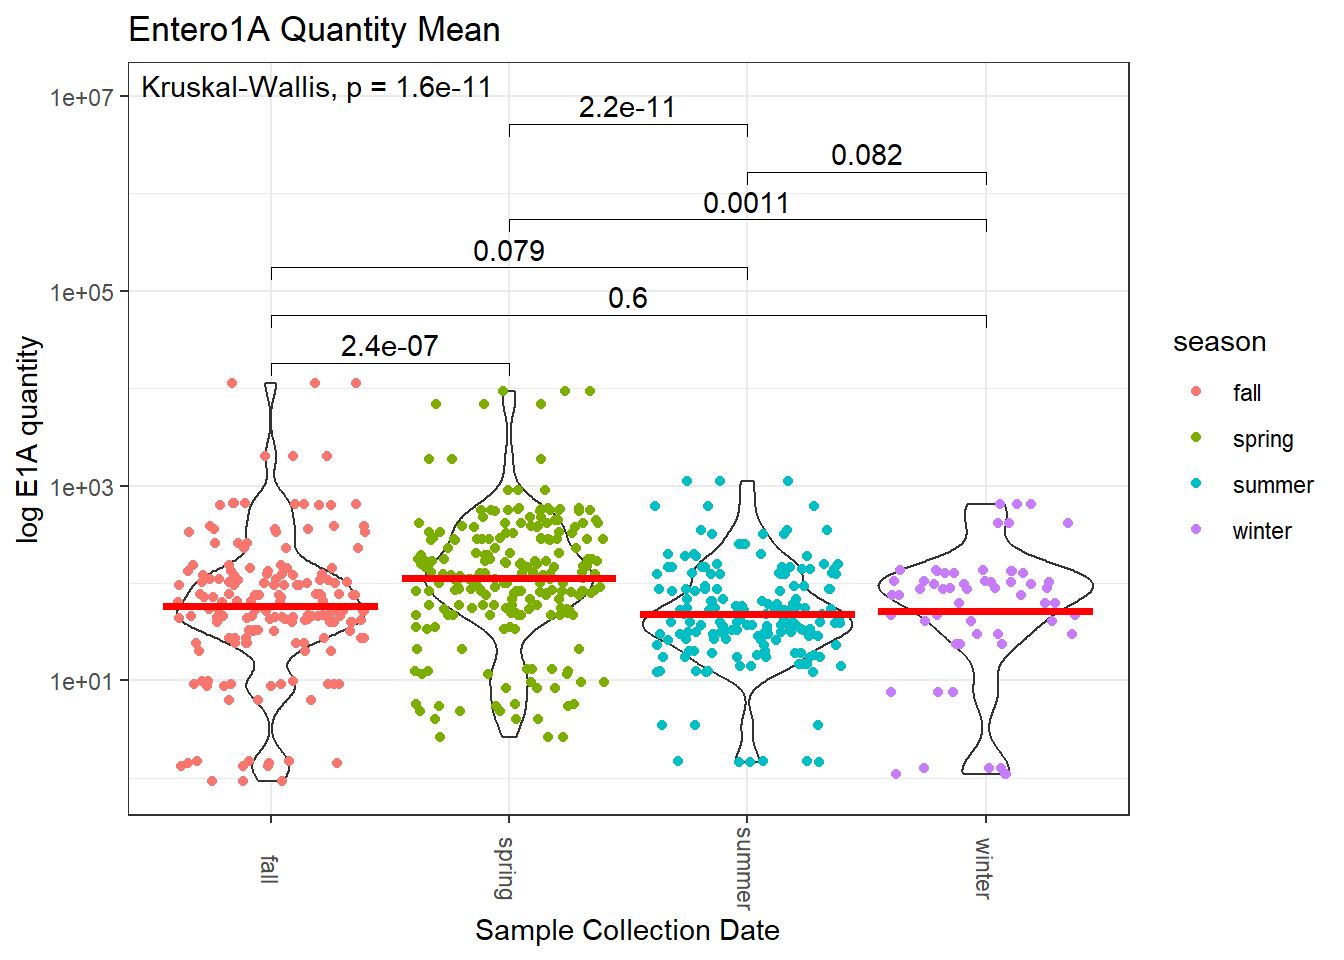

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.

       Comparison         Z      P.unadj        P.adj
1   fall - spring -5.109552 3.229235e-07 1.937541e-06
2   fall - summer  1.636169 1.018042e-01 6.108252e-01
3 spring - summer  6.858690 6.949464e-12 4.169679e-11
4   fall - winter -0.421744 6.732119e-01 1.000000e+00
5 spring - winter  3.054913 2.251256e-03 1.350754e-02
6 summer - winter -1.578690 1.144071e-01 6.864427e-01

In [ ]:
ggplot(e1a2024, aes(season, quantity_mean))+
  geom_violin()+
  geom_jitter(aes(color = season))+
  scale_y_log10()+
  #geom_hline(aes(yintercept = 1000, linetype = "1000 cpy/100ml"))+
  scale_shape_manual(values = c(19,1))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = -90, vjust = .5))+
  labs(title = "Entero1A Quantity Mean", y = "log E1A quantity", x = "Sample Collection Date")+
  scale_linetype_manual(name = "Hazard Limit", values = c(1))+
  stat_compare_means(method = "kruskal.test", label.x = .75, label.y = 7)+  # Add the overall p-value
  stat_compare_means(comparisons = list(c("fall","spring"),
                                 c("fall","winter"),
                                 c("fall","summer"),
                                 c("winter","spring"),
                                 c("winter","summer"),
                                 c("spring","summer")))+
  stat_summary(fun = "mean",
               geom = "crossbar",
               color = "red")


(`stat_ydensity()`).

(`stat_compare_means()`).

(`stat_signif()`).

Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed

(`stat_summary()`).

(`geom_point()`).

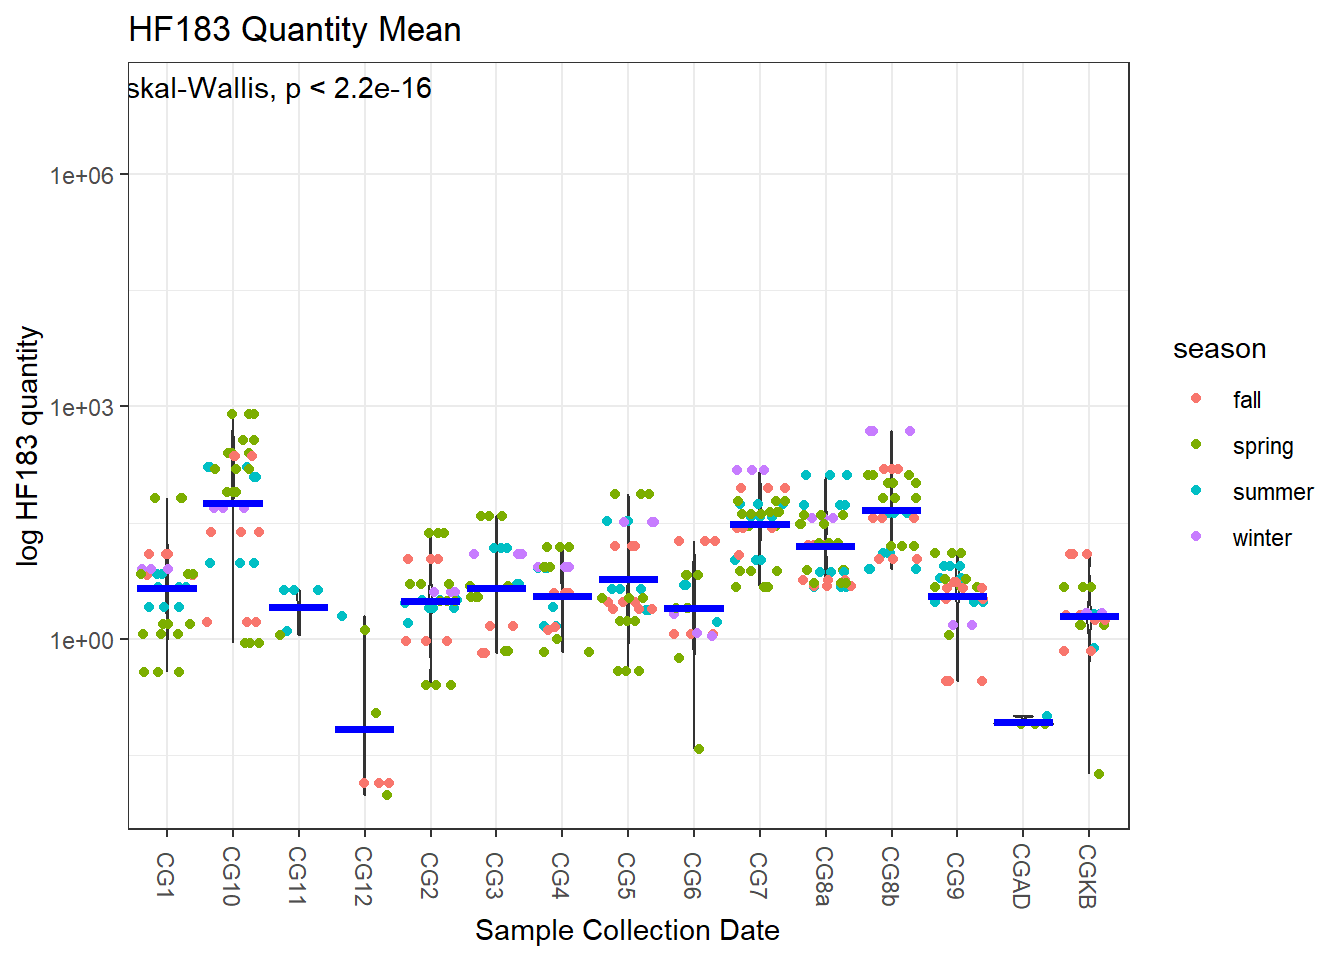

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.

     Comparison           Z      P.unadj        P.adj
1    CG1 - CG10 -5.23588560 1.641956e-07 1.724054e-05
2    CG1 - CG11  1.10233735 2.703150e-01 1.000000e+00
3   CG10 - CG11  3.72076933 1.986168e-04 2.085476e-02
4    CG1 - CG12  2.96633285 3.013741e-03 3.164428e-01
5   CG10 - CG12  6.02404895 1.701069e-09 1.786122e-07
6   CG11 - CG12  1.20462342 2.283487e-01 1.000000e+00
7     CG1 - CG2  1.05310641 2.922922e-01 1.000000e+00
8    CG10 - CG2  6.14378479 8.057800e-10 8.460690e-08
9    CG11 - CG2 -0.53891865 5.899430e-01 1.000000e+00
10   CG12 - CG2 -2.29465225 2.175306e-02 1.000000e+00
11    CG1 - CG3  0.06419706 9.488133e-01 1.000000e+00
12   CG10 - CG3  4.95784823 7.127821e-07 7.484212e-05
13   CG11 - CG3 -1.04884232 2.942507e-01 1.000000e+00
14   CG12 - CG3 -2.85929460 4.245843e-03 4.458135e-01
15    CG2 - CG3 -0.93013721 3.523000e-01 1.000000e+00
16    CG1 - CG4  0.64052525 5.218312e-01 1.000000e+00
17   CG10 - CG4  5.55476602 2.779839e-08 2.918831e-06
18   CG11 - CG4 -0.73935486 

In [ ]:
ggplot(hf1832024, aes(site, quantity_mean))+
  geom_violin()+
  geom_jitter(aes(color = season))+
  scale_y_log10()+
  #geom_hline(aes(yintercept = 1000, linetype = "1000 cpy/100ml"))+
  scale_shape_manual(values = c(19,1))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = -90, vjust = .5))+
  labs(title = "HF183 Quantity Mean", y = "log HF183 quantity", x = "Sample Collection Date")+
  scale_linetype_manual(name = "Hazard Limit", values = c(1))+
  stat_compare_means(method = "kruskal.test", label.x = .75, label.y = 7)+  # Add the overall p-value
  stat_compare_means(comparisons = list(c("fall","spring"),
                                 c("fall","winter"),
                                 c("fall","summer"),
                                 c("winter","spring"),
                                 c("winter","summer"),
                                 c("spring","summer")))+
  stat_summary(fun = "mean",
               geom = "crossbar",
               color = "blue")


(`stat_ydensity()`).

(`stat_compare_means()`).

(`stat_signif()`).

Warning in wilcox.test.default(c(NA, NA, NA, NA, NA, -0.110904980058268, :
cannot compute exact p-value with ties

Warning in wilcox.test.default(c(NA, NA, NA, NA, NA, -0.110904980058268, :
cannot compute exact p-value with ties

Warning in wilcox.test.default(c(NA, NA, NA, NA, NA, -0.110904980058268, :
cannot compute exact p-value with ties

Warning in wilcox.test.default(c(NA, NA, NA, NA, NA, NA, 0.0582532259176185, :
cannot compute exact p-value with ties

Warning in wilcox.test.default(c(0.276081727205545, 0.276081727205545,
0.276081727205545, : cannot compute exact p-value with ties

Warning in wilcox.test.default(c(0.276081727205545, 0.276081727205545,
0.276081727205545, : cannot compute exact p-value with ties

(`stat_summary()`).

(`geom_point()`).

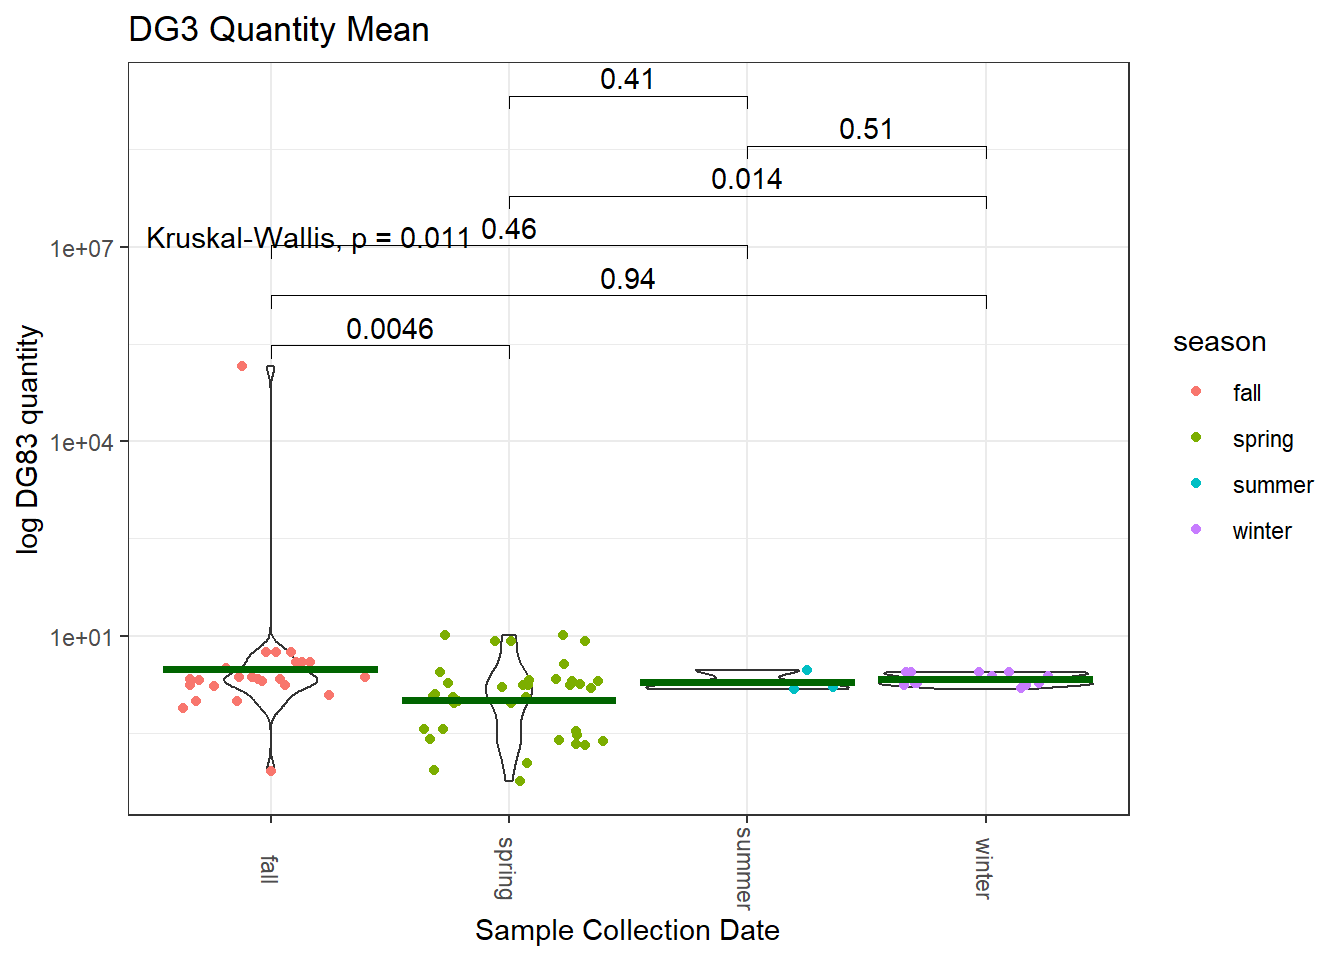

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.

     Comparison           Z      P.unadj        P.adj
1    CG1 - CG10 -5.23588560 1.641956e-07 1.724054e-05
2    CG1 - CG11  1.10233735 2.703150e-01 1.000000e+00
3   CG10 - CG11  3.72076933 1.986168e-04 2.085476e-02
4    CG1 - CG12  2.96633285 3.013741e-03 3.164428e-01
5   CG10 - CG12  6.02404895 1.701069e-09 1.786122e-07
6   CG11 - CG12  1.20462342 2.283487e-01 1.000000e+00
7     CG1 - CG2  1.05310641 2.922922e-01 1.000000e+00
8    CG10 - CG2  6.14378479 8.057800e-10 8.460690e-08
9    CG11 - CG2 -0.53891865 5.899430e-01 1.000000e+00
10   CG12 - CG2 -2.29465225 2.175306e-02 1.000000e+00
11    CG1 - CG3  0.06419706 9.488133e-01 1.000000e+00
12   CG10 - CG3  4.95784823 7.127821e-07 7.484212e-05
13   CG11 - CG3 -1.04884232 2.942507e-01 1.000000e+00
14   CG12 - CG3 -2.85929460 4.245843e-03 4.458135e-01
15    CG2 - CG3 -0.93013721 3.523000e-01 1.000000e+00
16    CG1 - CG4  0.64052525 5.218312e-01 1.000000e+00
17   CG10 - CG4  5.55476602 2.779839e-08 2.918831e-06
18   CG11 - CG4 -0.73935486 

In [ ]:
ggplot(dg32024, aes(season, quantity_mean))+
  geom_violin()+
  geom_jitter(aes(color = season))+
  scale_y_log10()+
  #geom_hline(aes(yintercept = 1000, linetype = "1000 cpy/100ml"))+
  scale_shape_manual(values = c(19,1))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = -90, vjust = .5))+
  labs(title = "DG3 Quantity Mean", y = "log DG83 quantity", x = "Sample Collection Date")+
  scale_linetype_manual(name = "Hazard Limit", values = c(1))+
  stat_compare_means(method = "kruskal.test", label.x = .75, label.y = 7)+  # Add the overall p-value
  stat_compare_means(comparisons = list(c("fall","spring"),
                                 c("fall","winter"),
                                 c("fall","summer"),
                                 c("winter","spring"),
                                 c("winter","summer"),
                                 c("spring","summer")))+
  stat_summary(fun = "mean",
               geom = "crossbar",
               color = "darkgreen")


(`stat_ydensity()`).

(`geom_point()`).

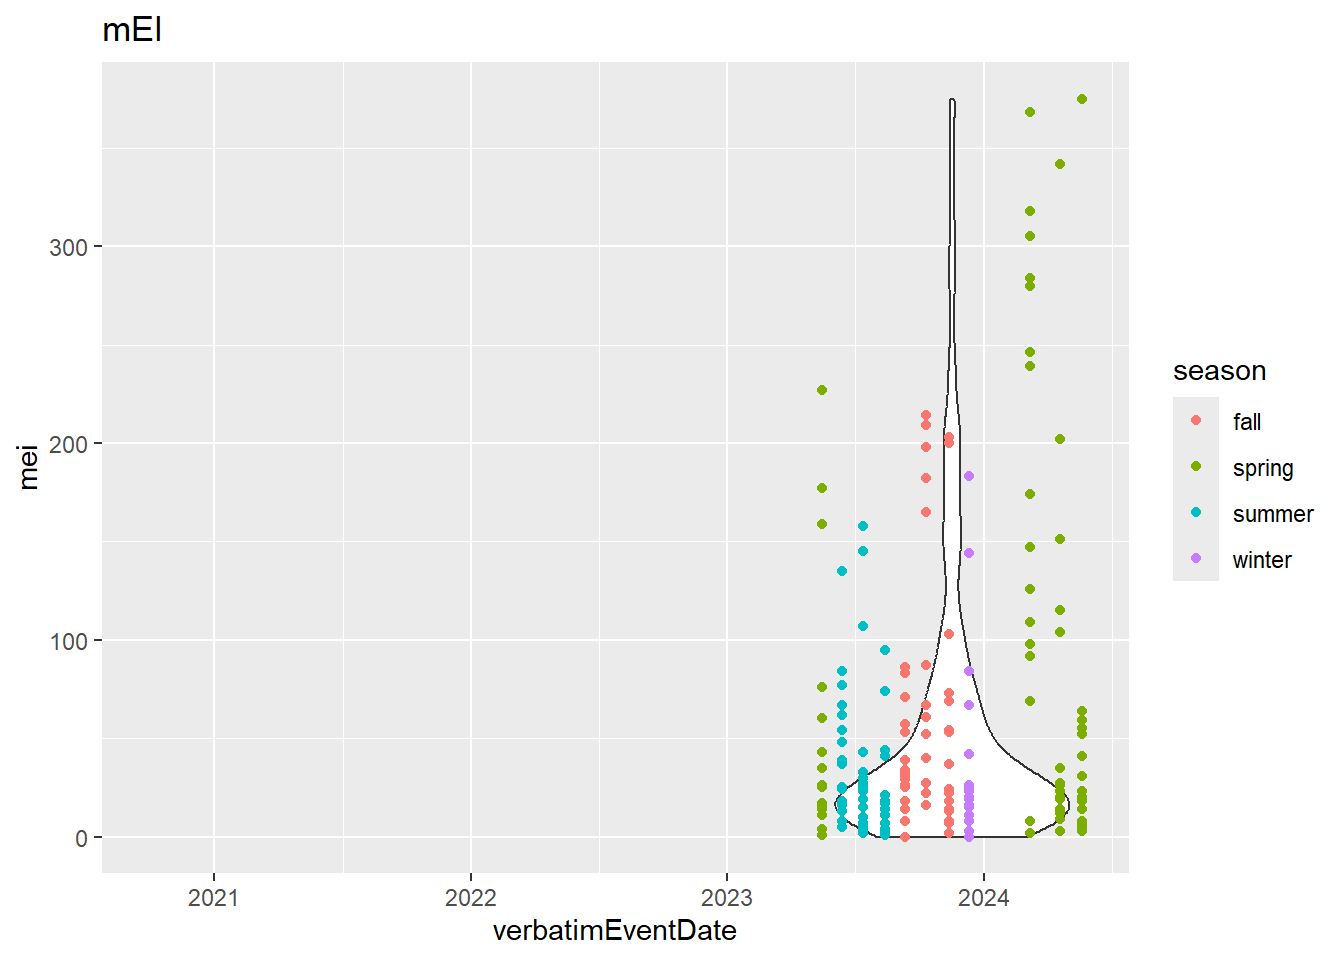

(`stat_ydensity()`).

(`stat_compare_means()`).

(`geom_point()`).

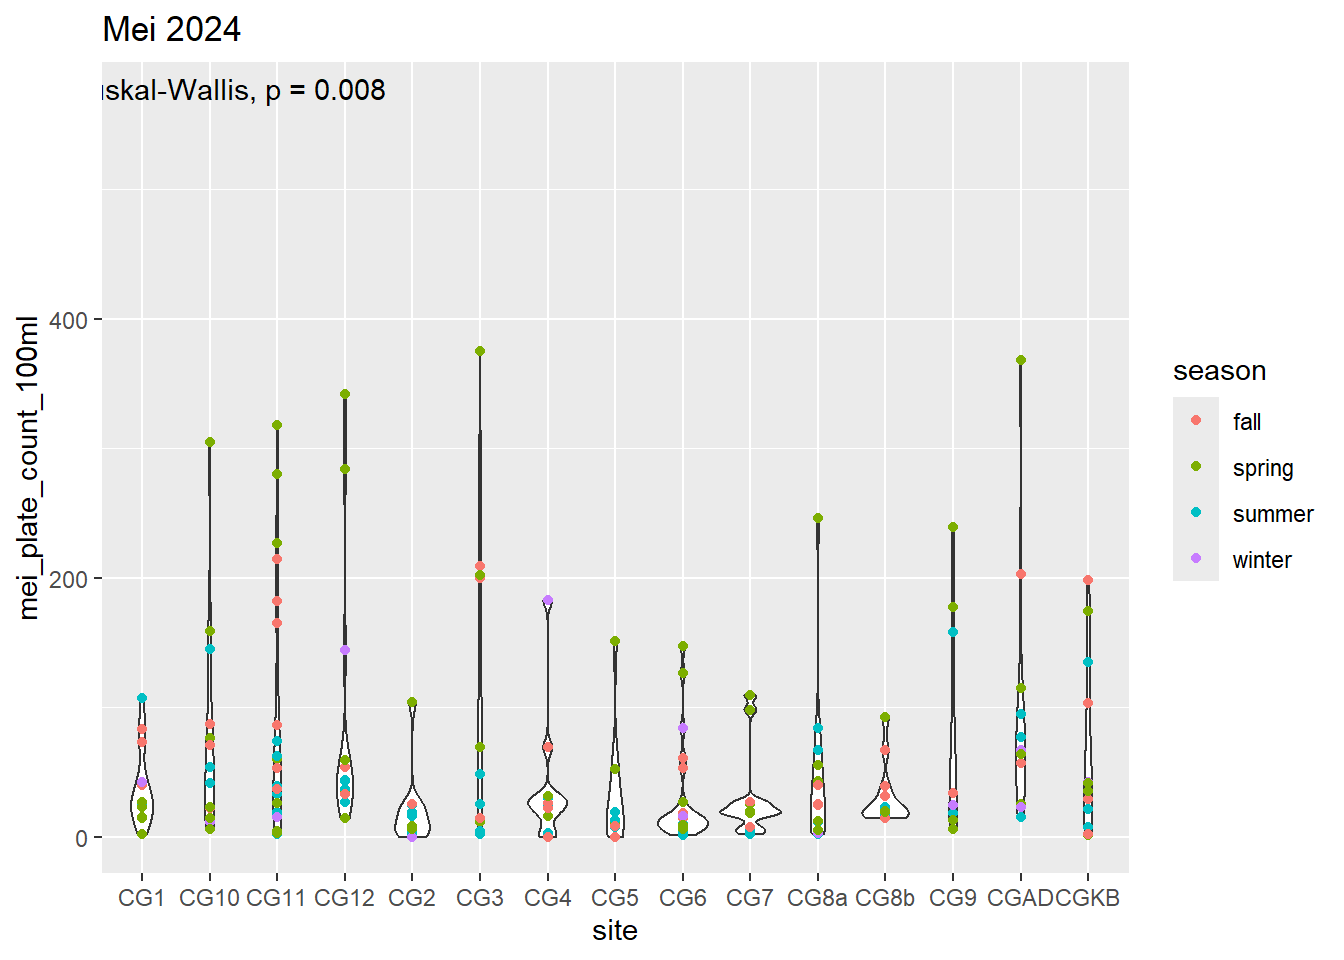

In [ ]:
ggplot(faire_cgw, aes(verbatimEventDate, mei))+
  geom_violin()+
  geom_point(aes(color = season))+
  labs(title = "mEI")


(`stat_ydensity()`).

(`geom_point()`).

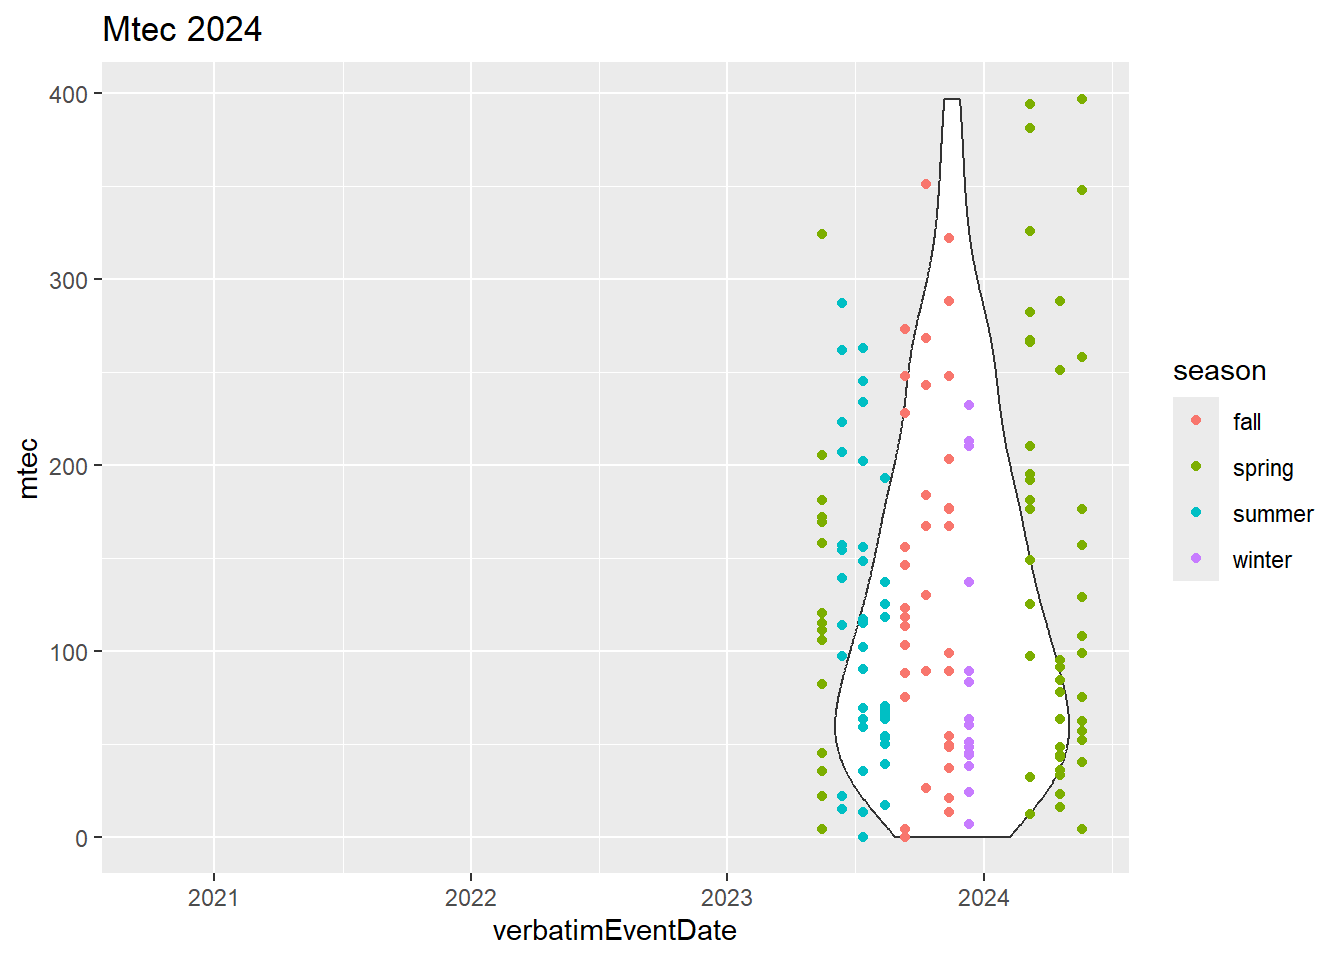

(`stat_ydensity()`).
Removed 966 rows containing missing values or values outside the scale range
(`geom_point()`).

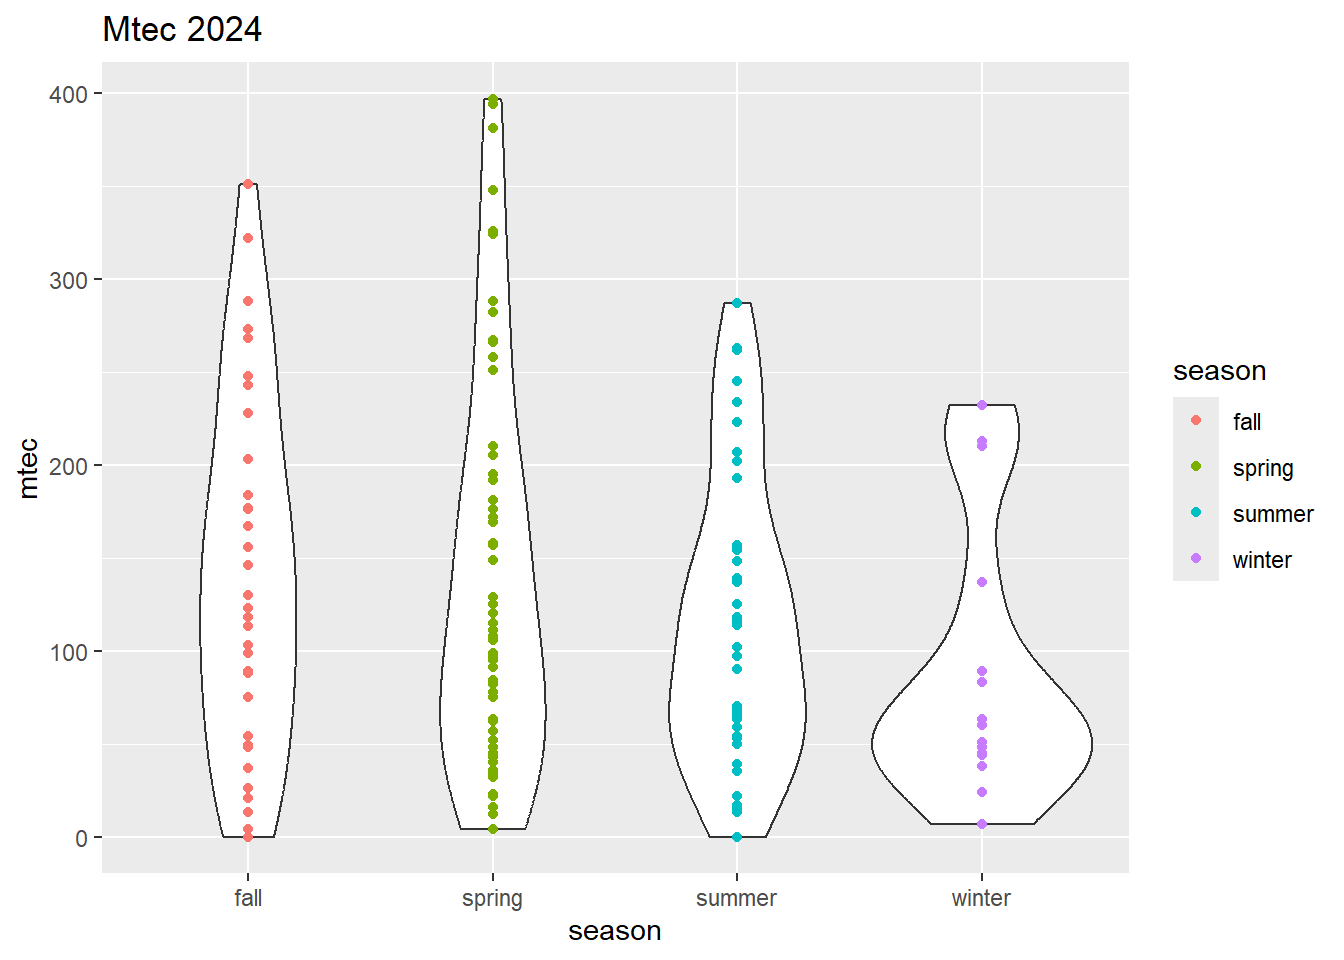

In [ ]:
ggplot(faire_cgw, aes(verbatimEventDate, mtec))+
  geom_violin()+
  geom_point(aes(color = season))+
  labs(title = "Mtec 2024")


(`stat_ydensity()`).

(`stat_summary()`).

(`geom_point()`).

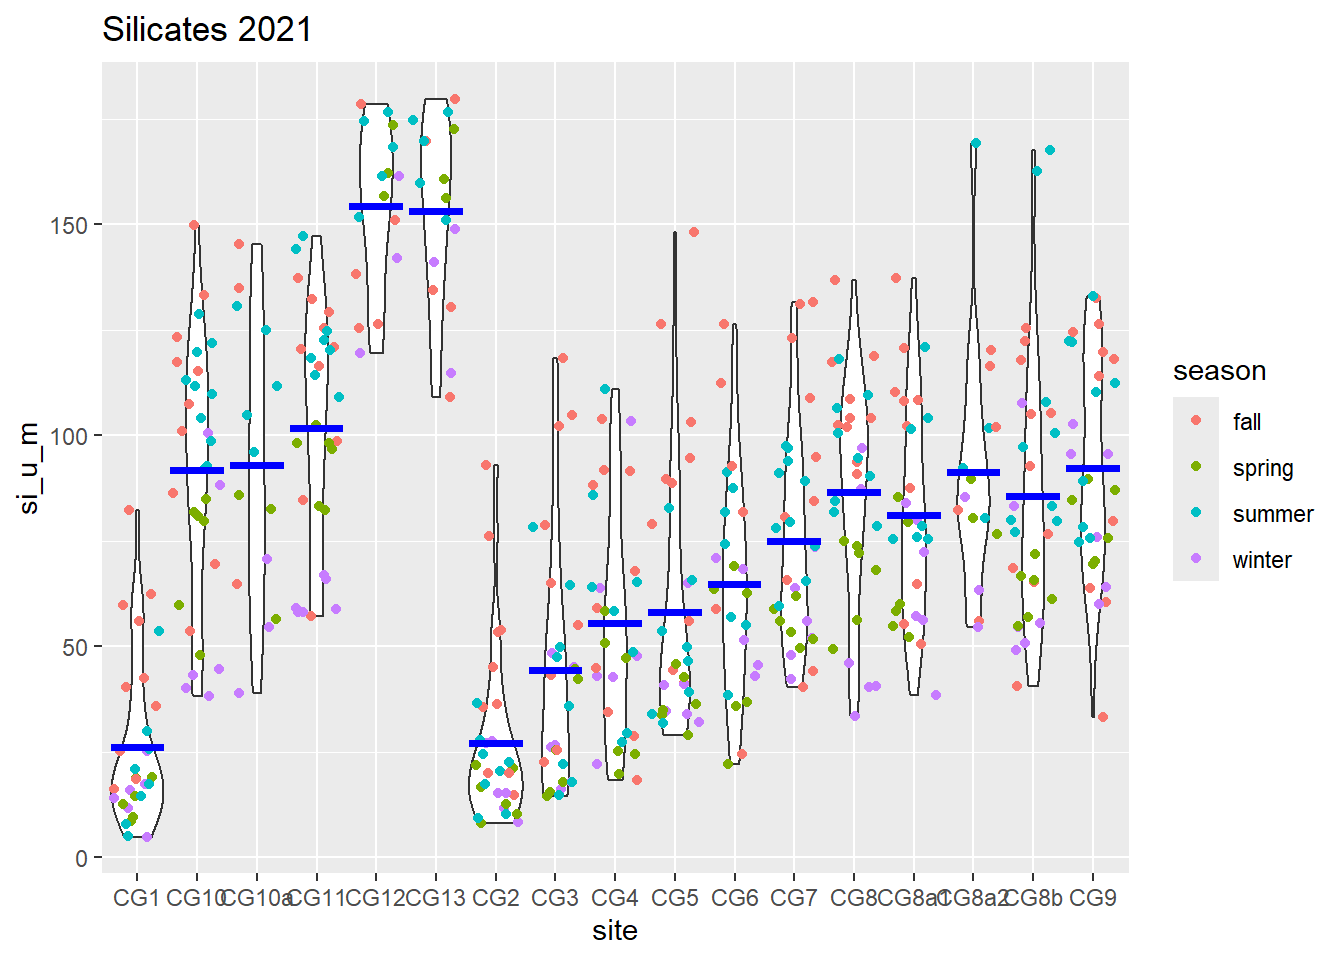

(`stat_ydensity()`).

(`stat_summary()`).

(`geom_point()`).

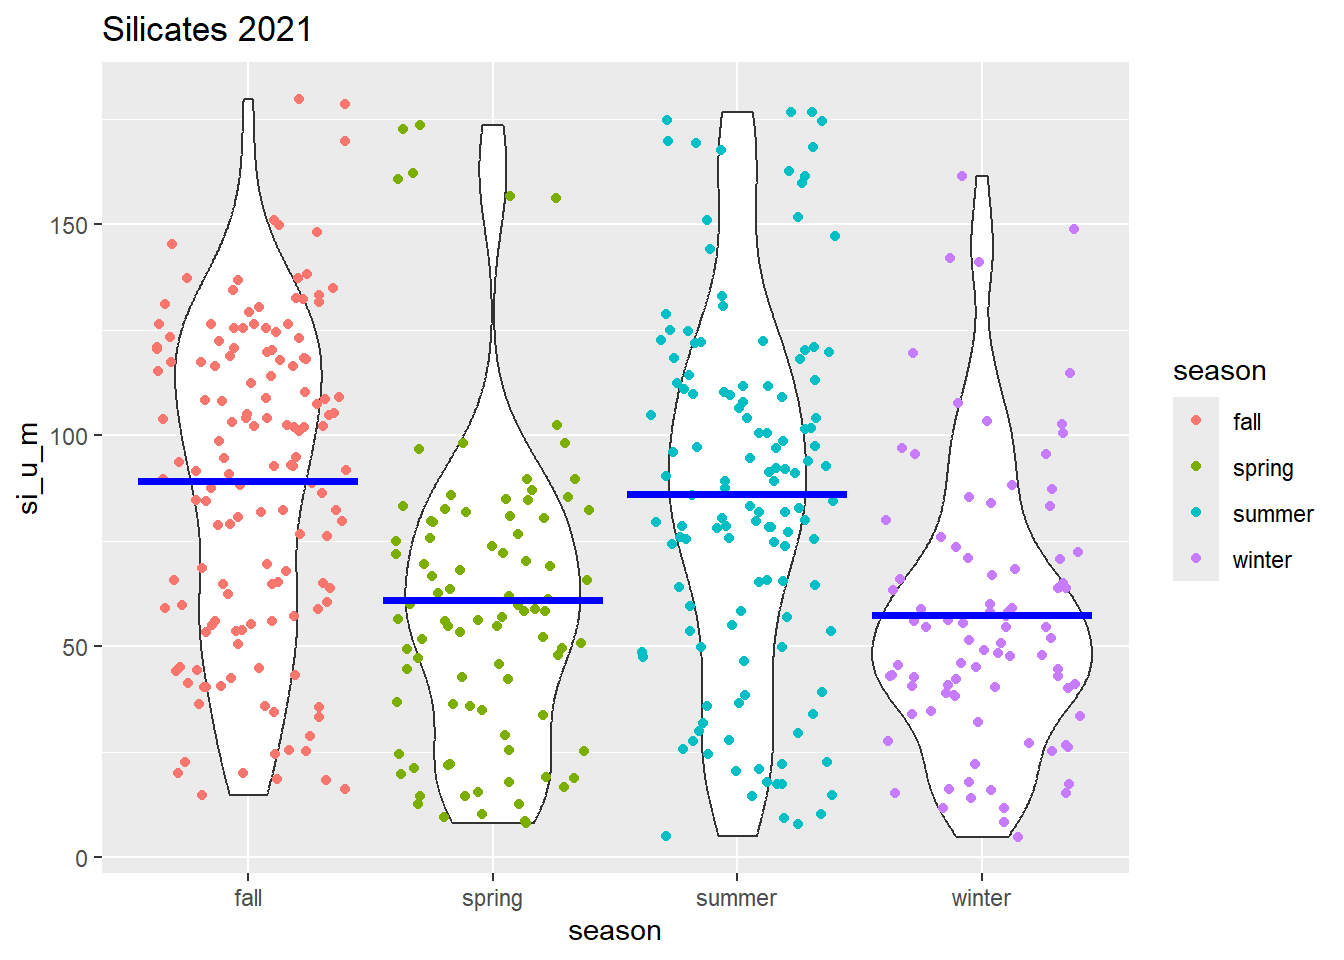

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

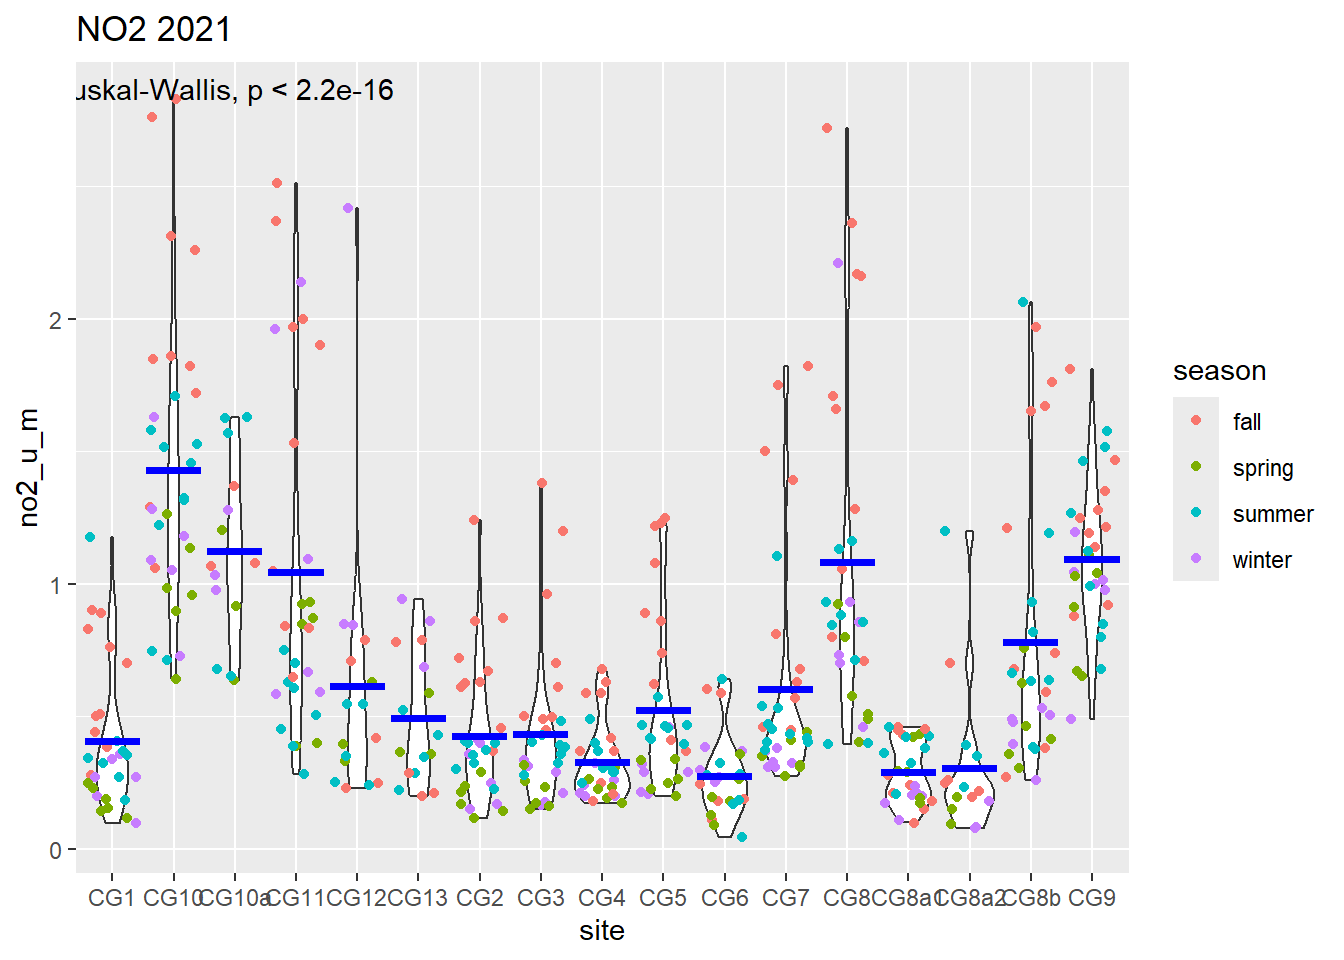

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

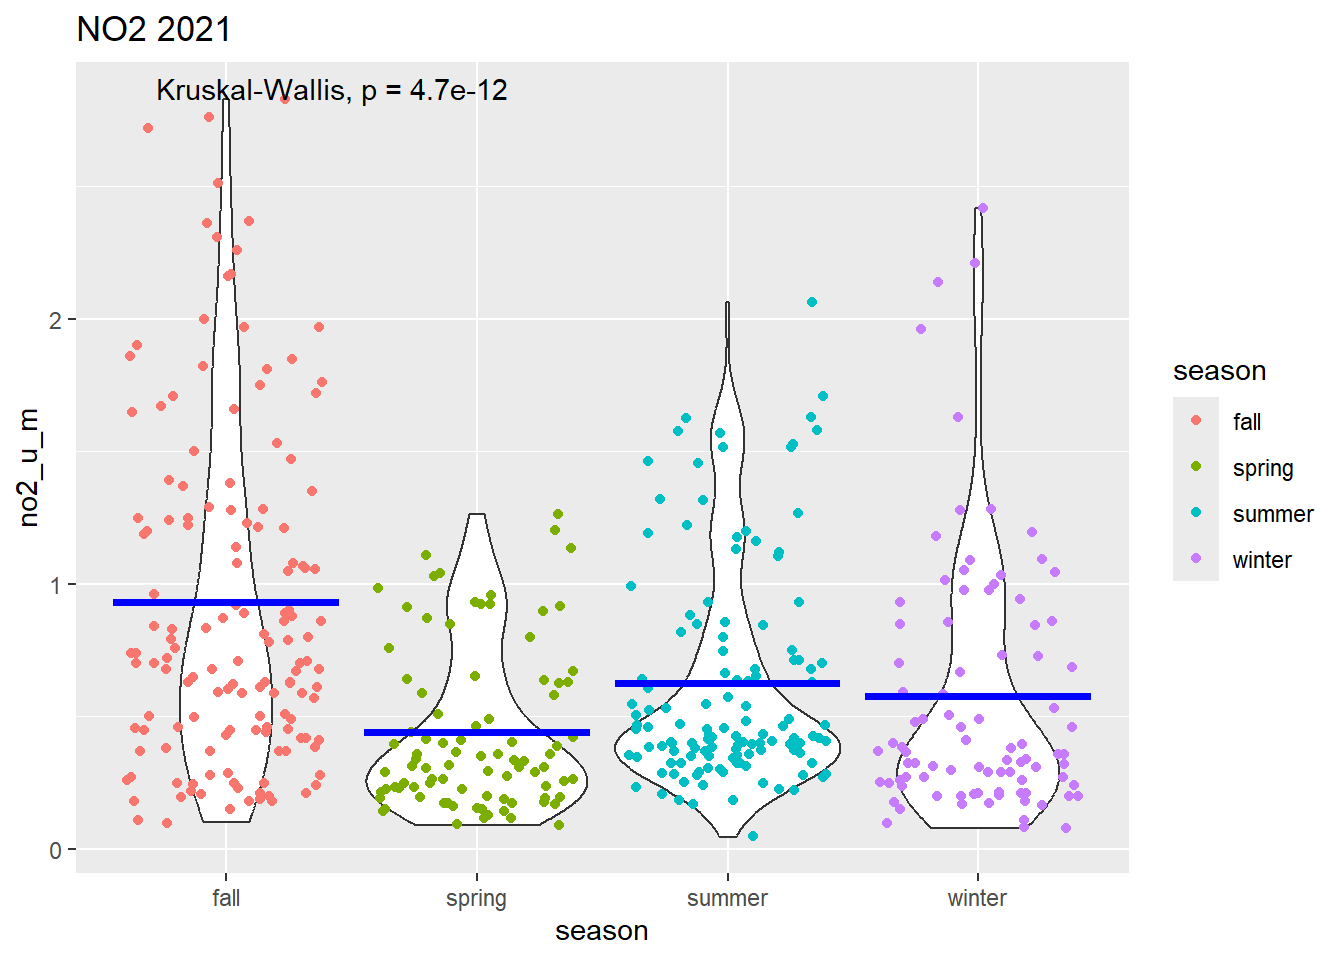

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

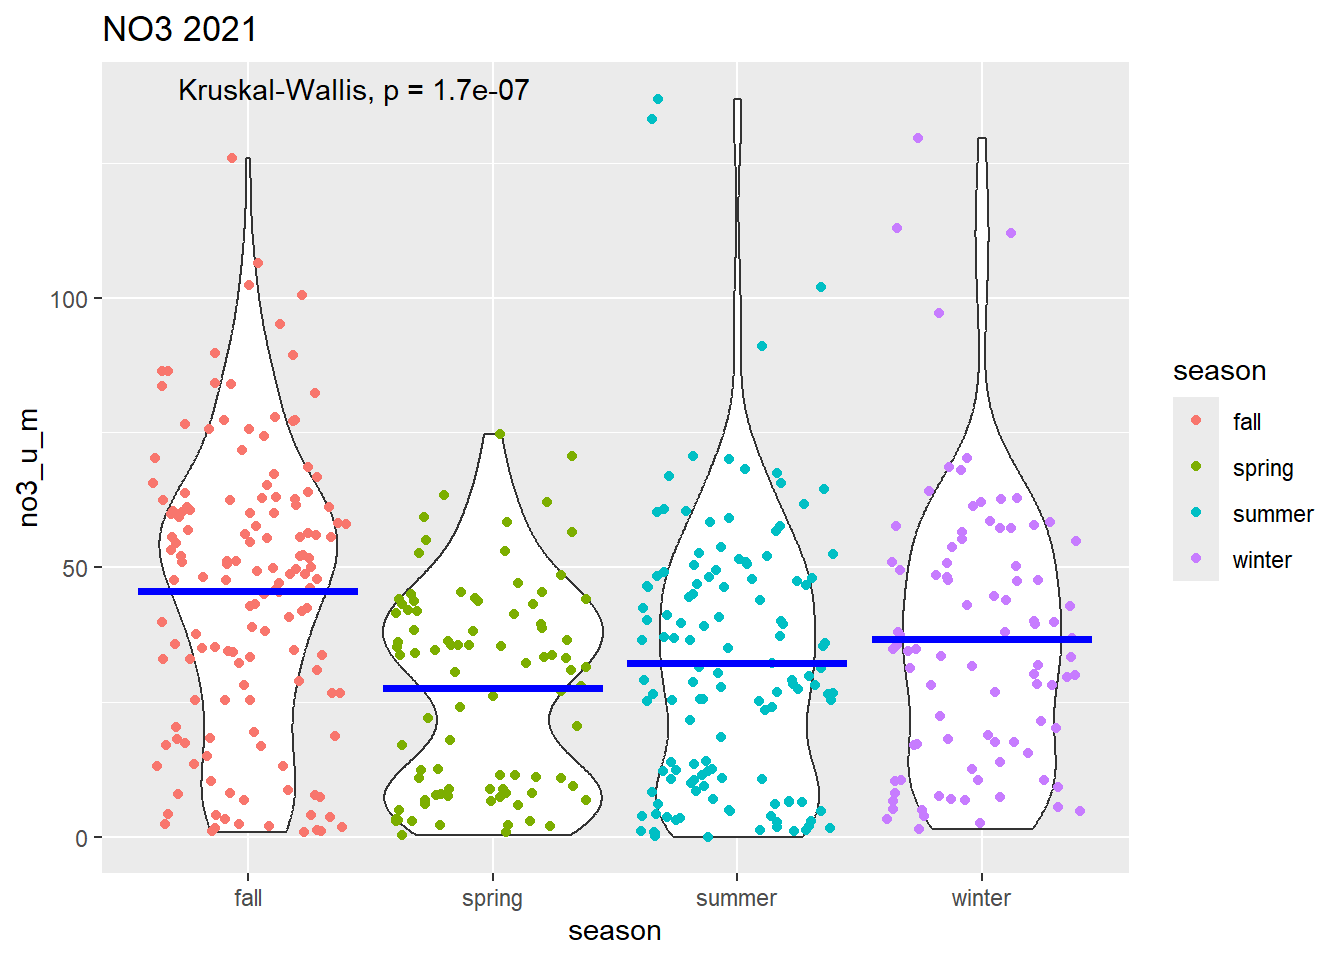

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

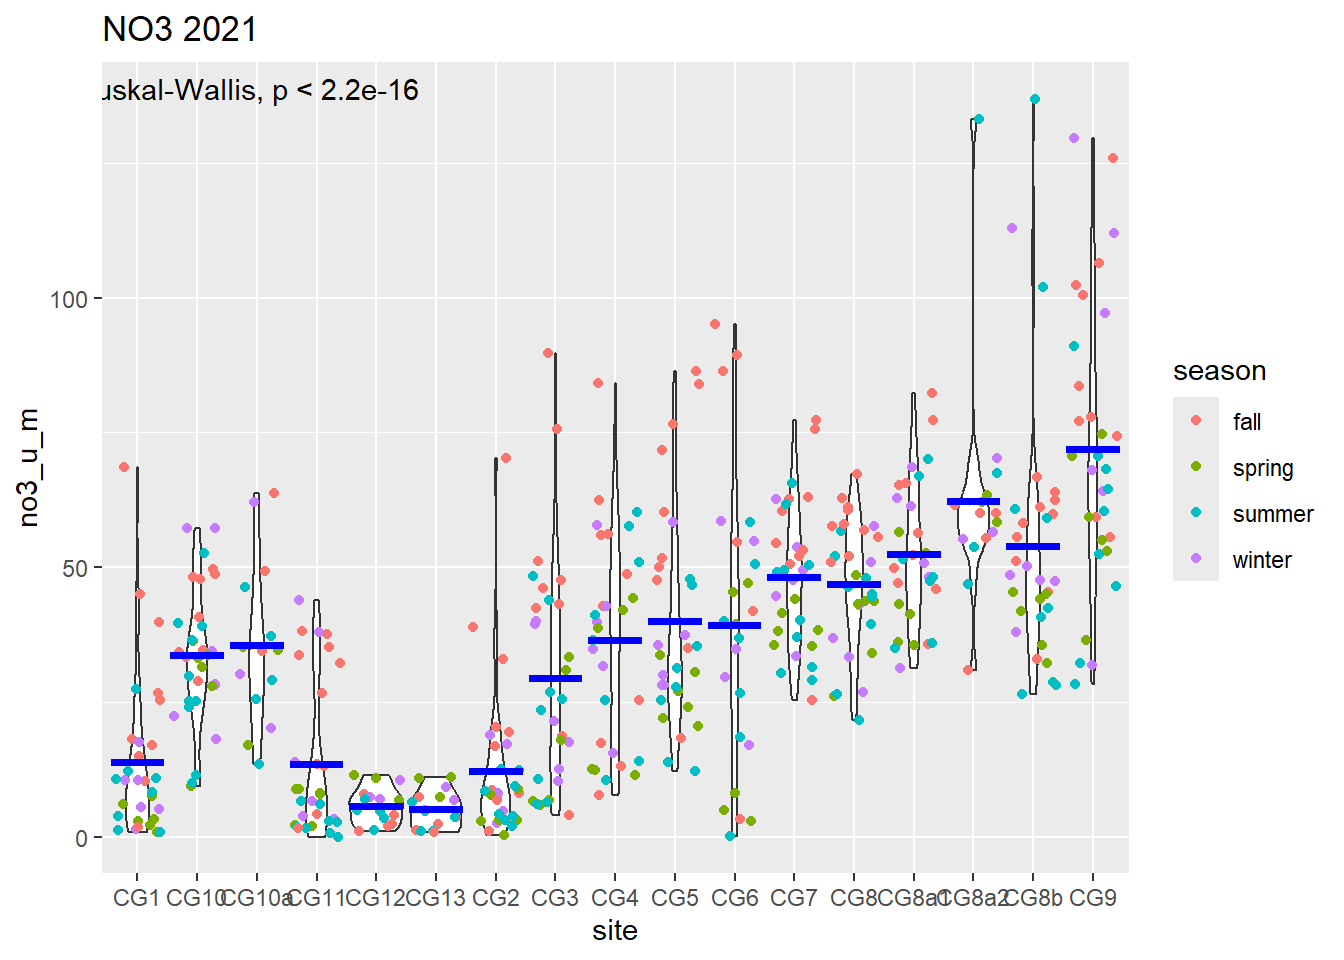

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

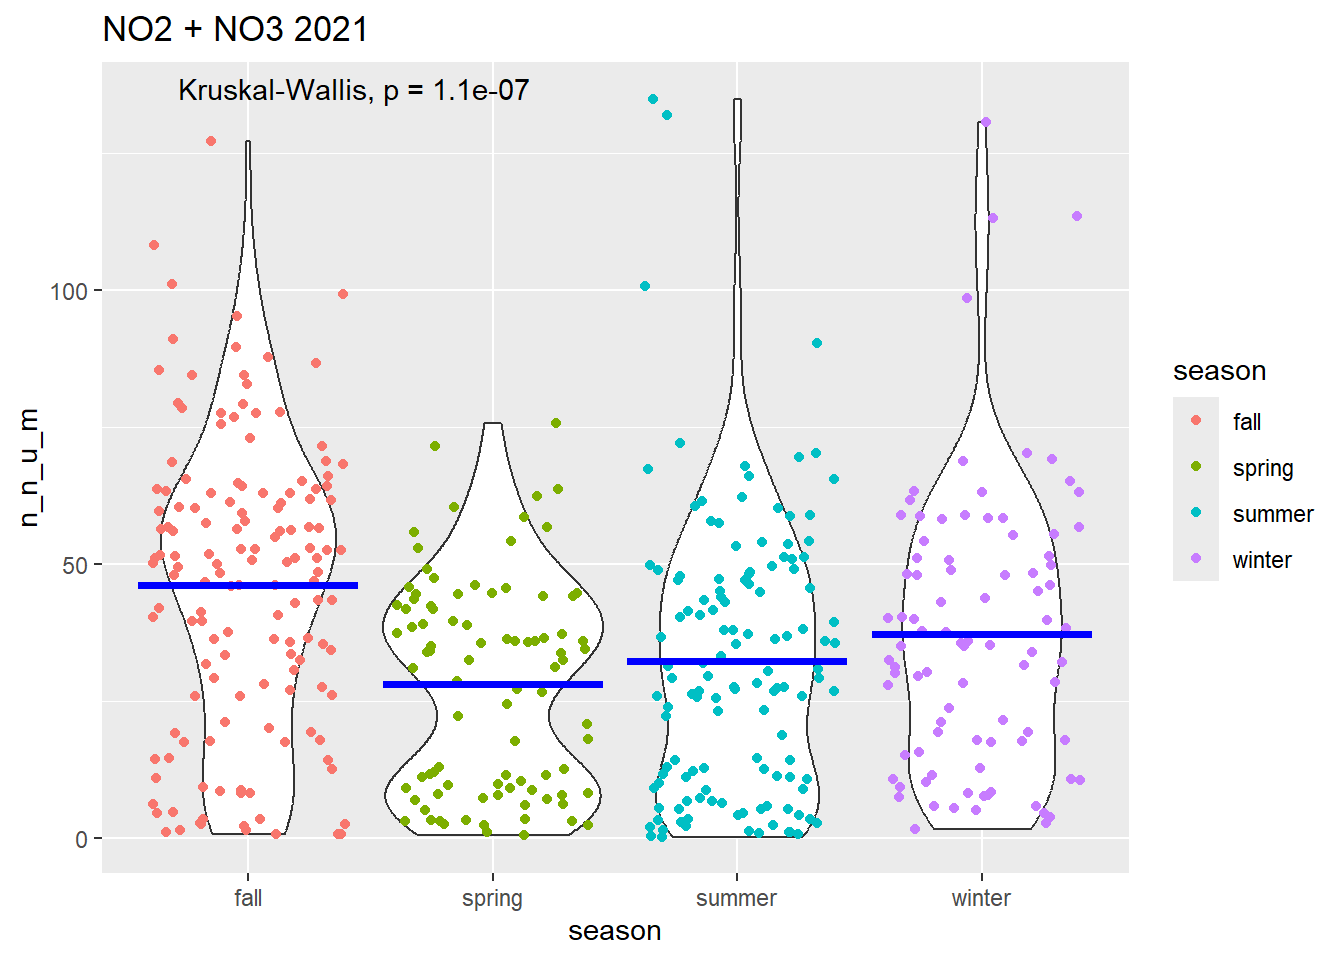

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

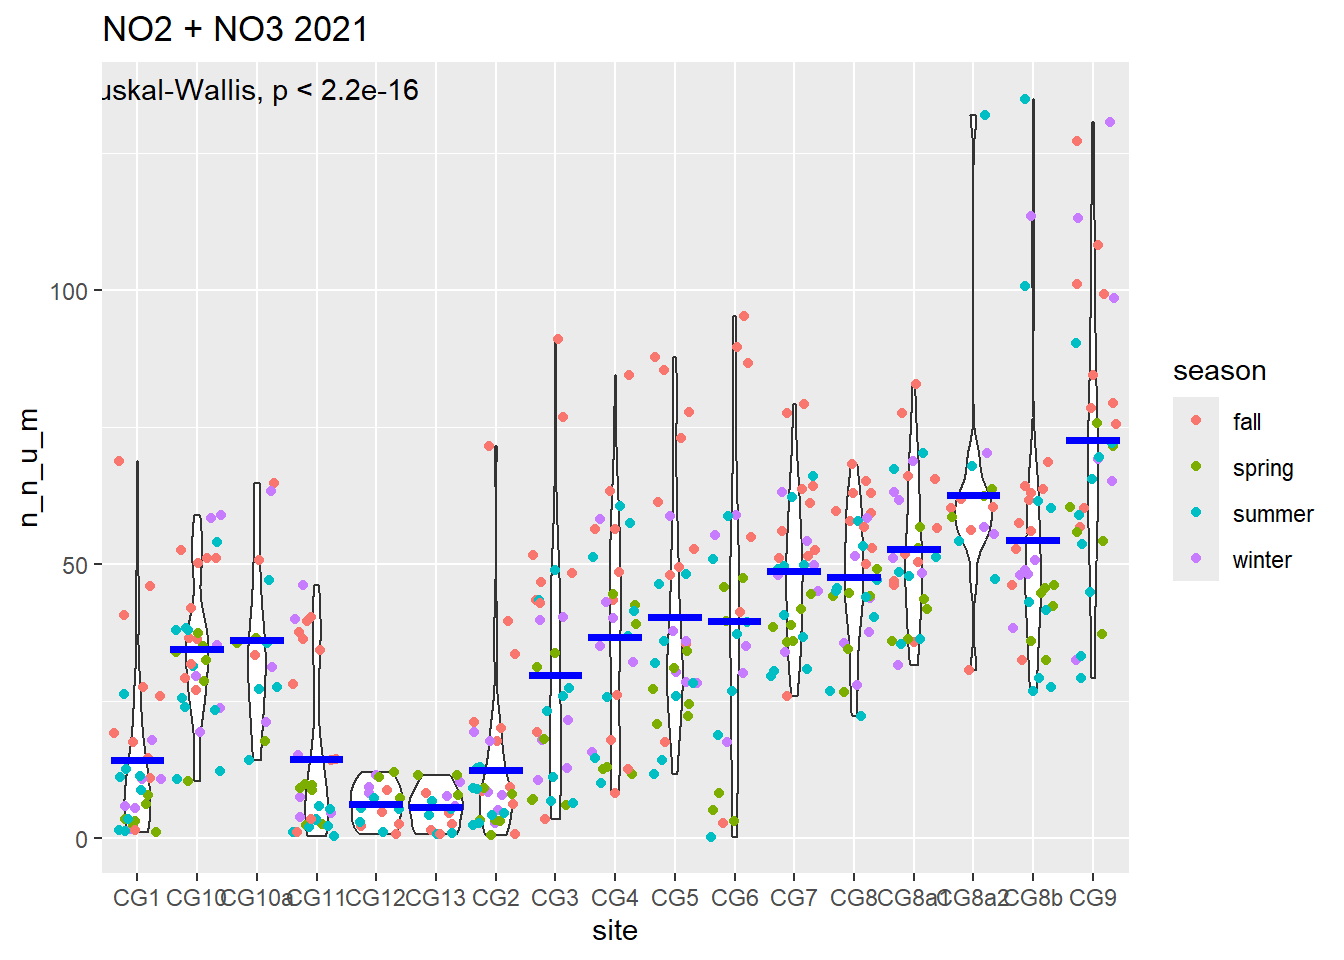

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

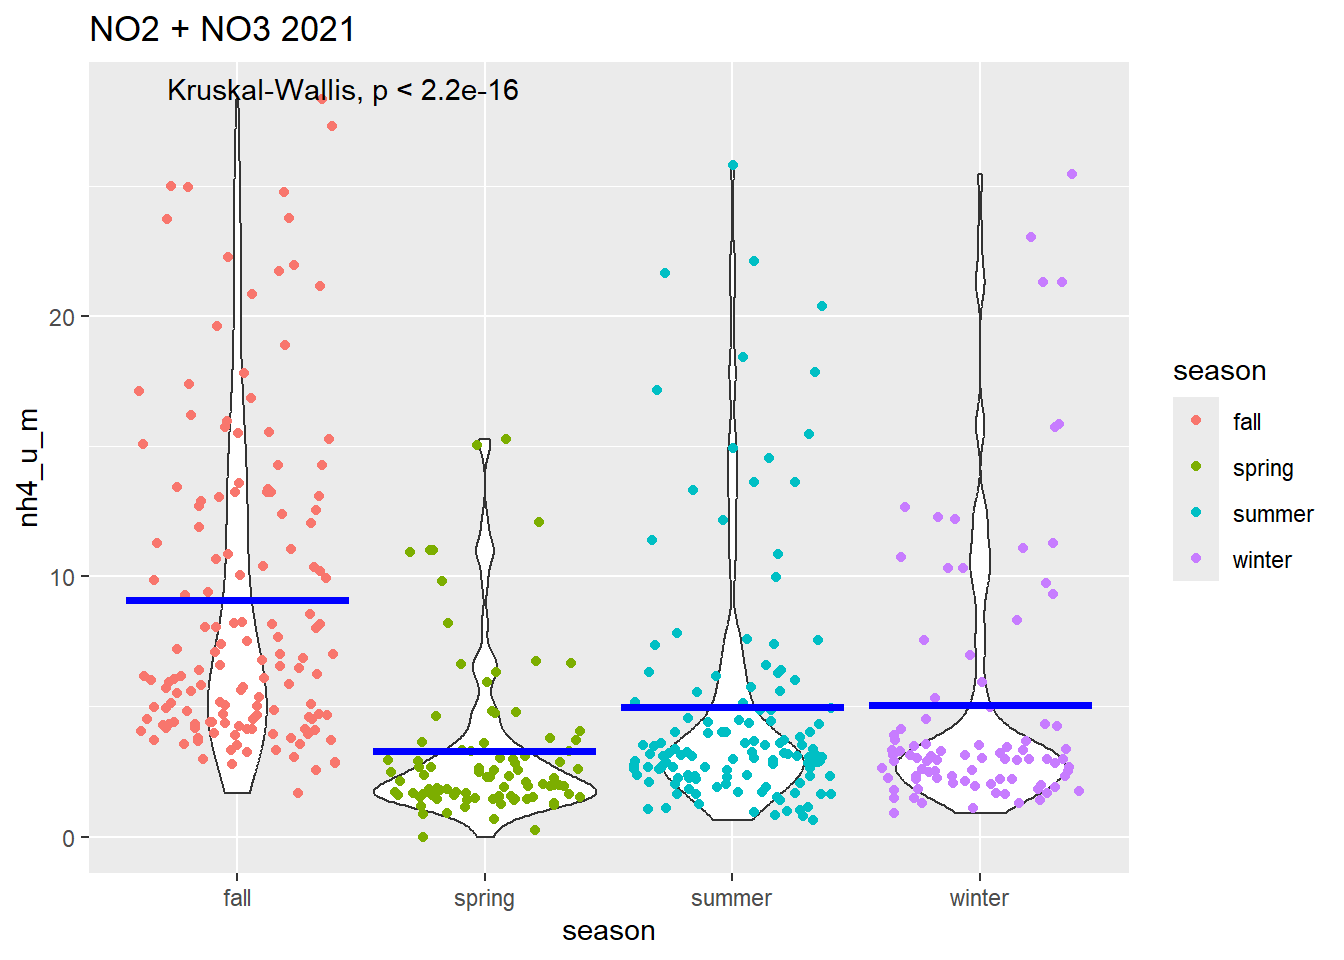

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

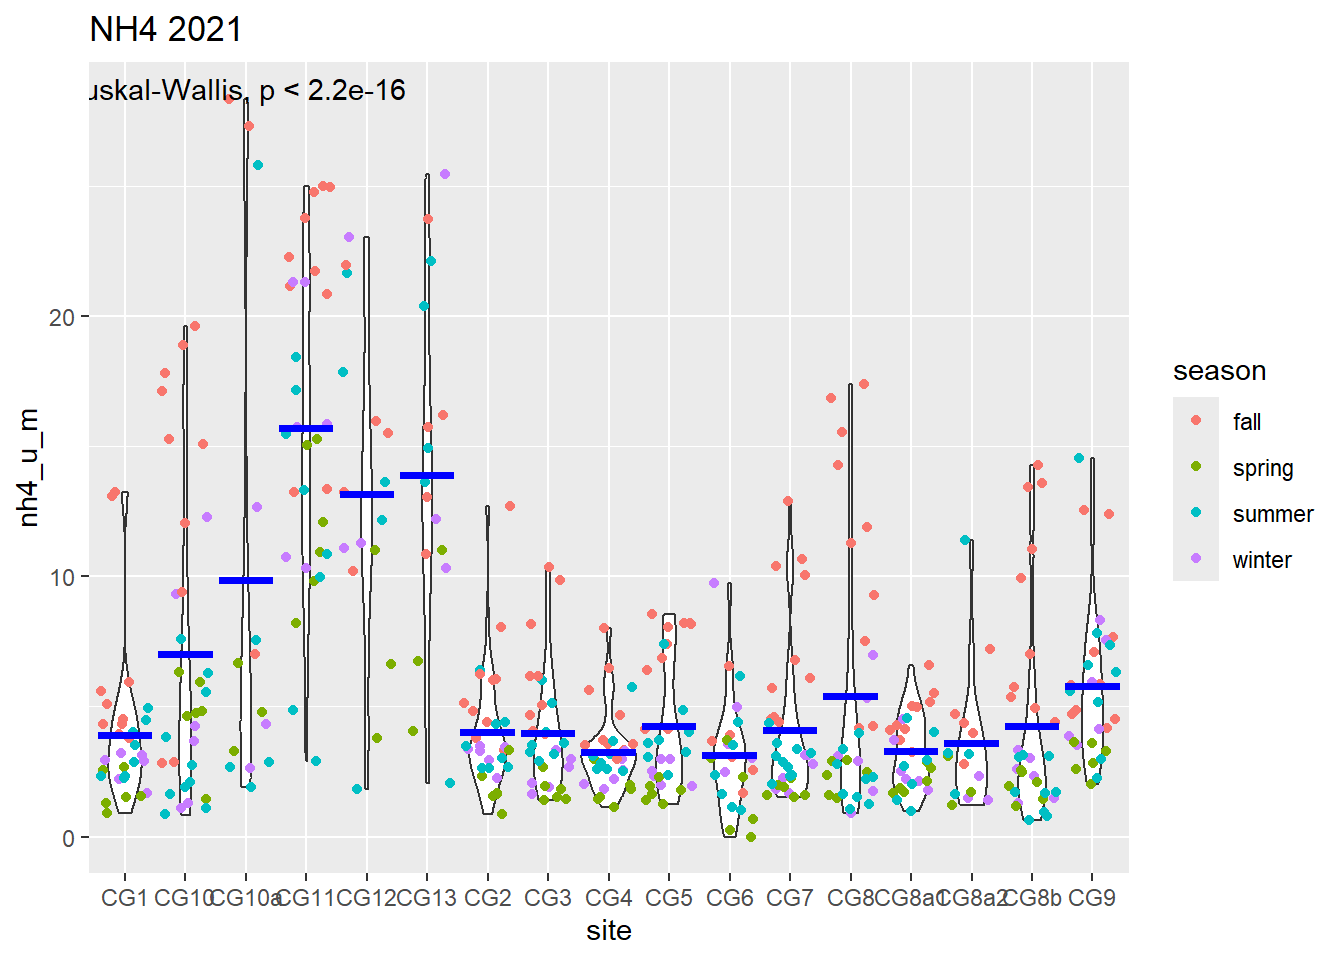

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

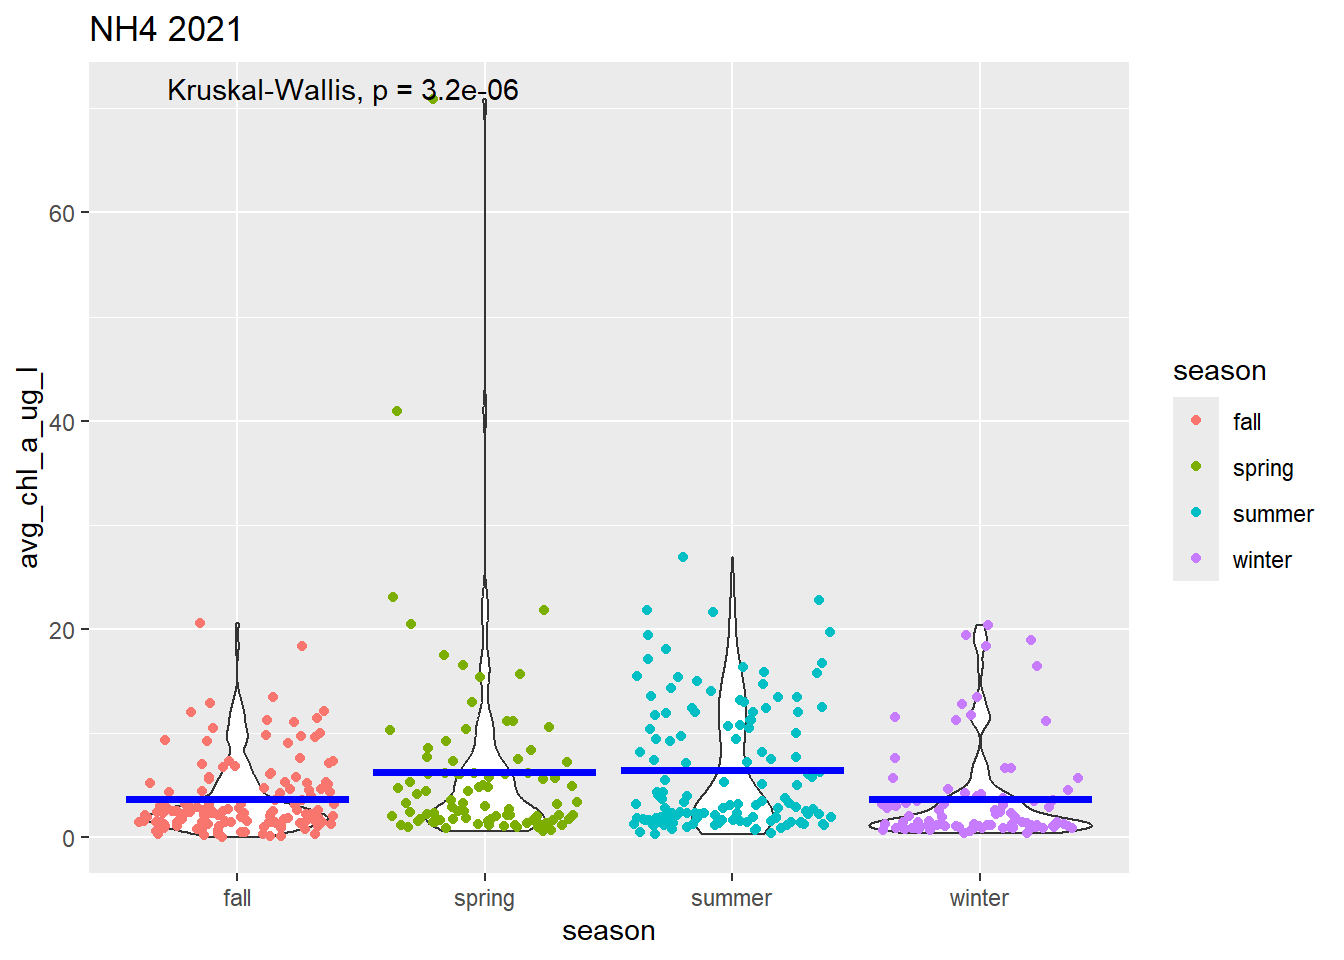

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

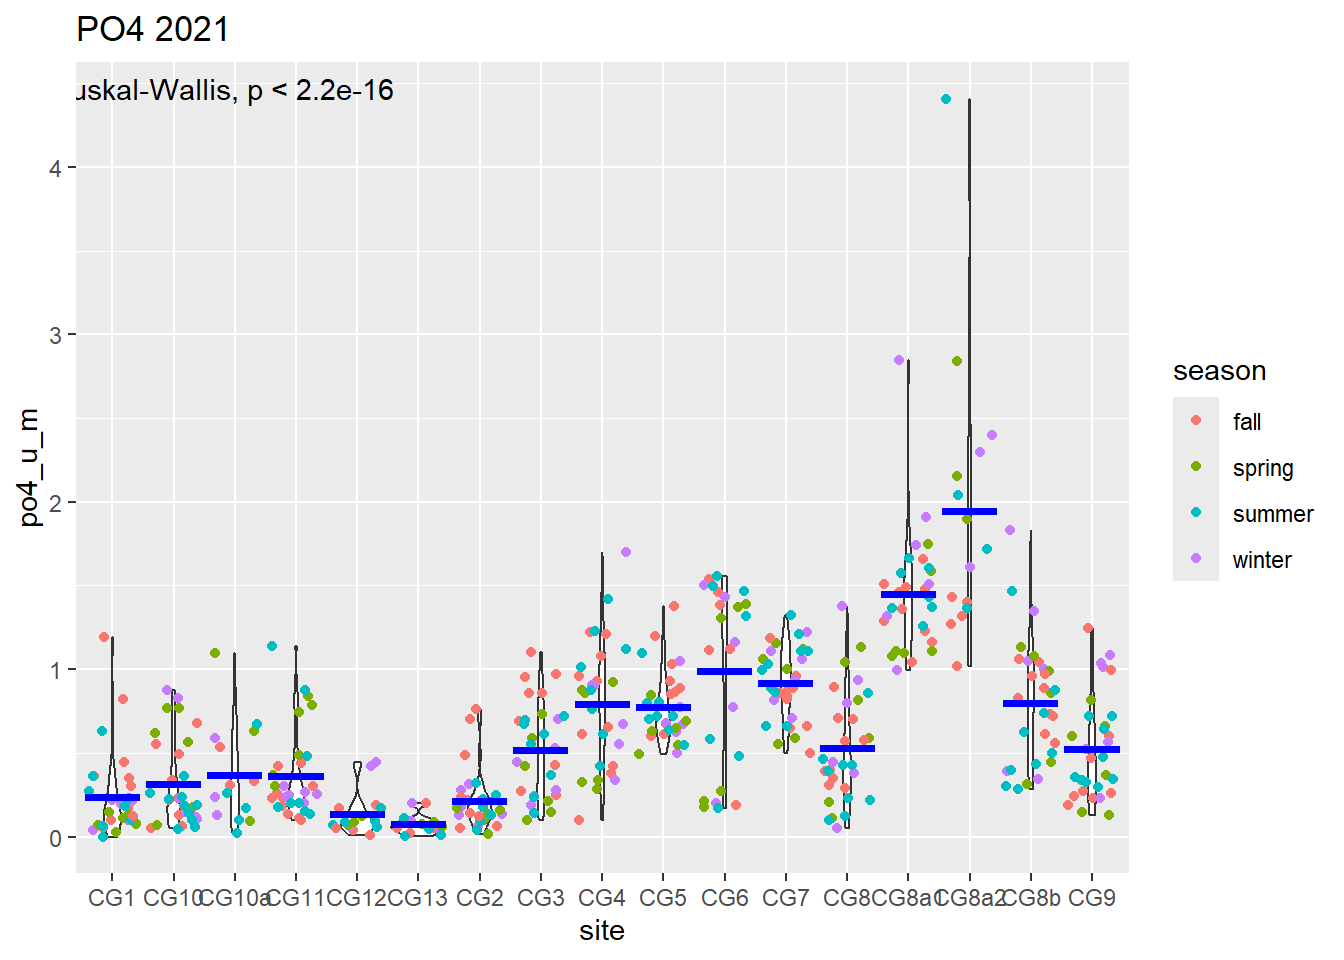

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

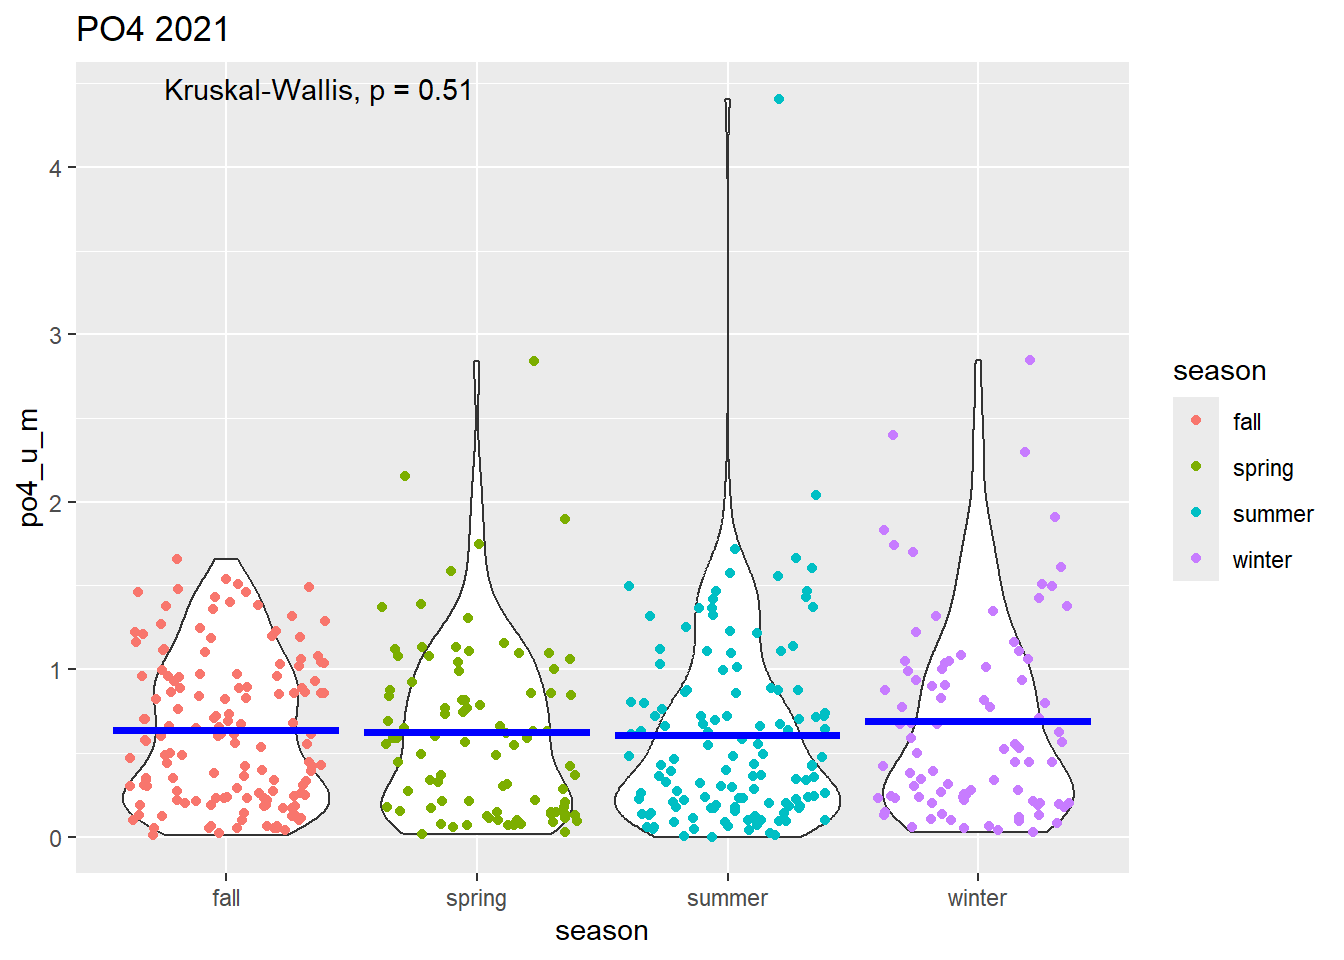

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

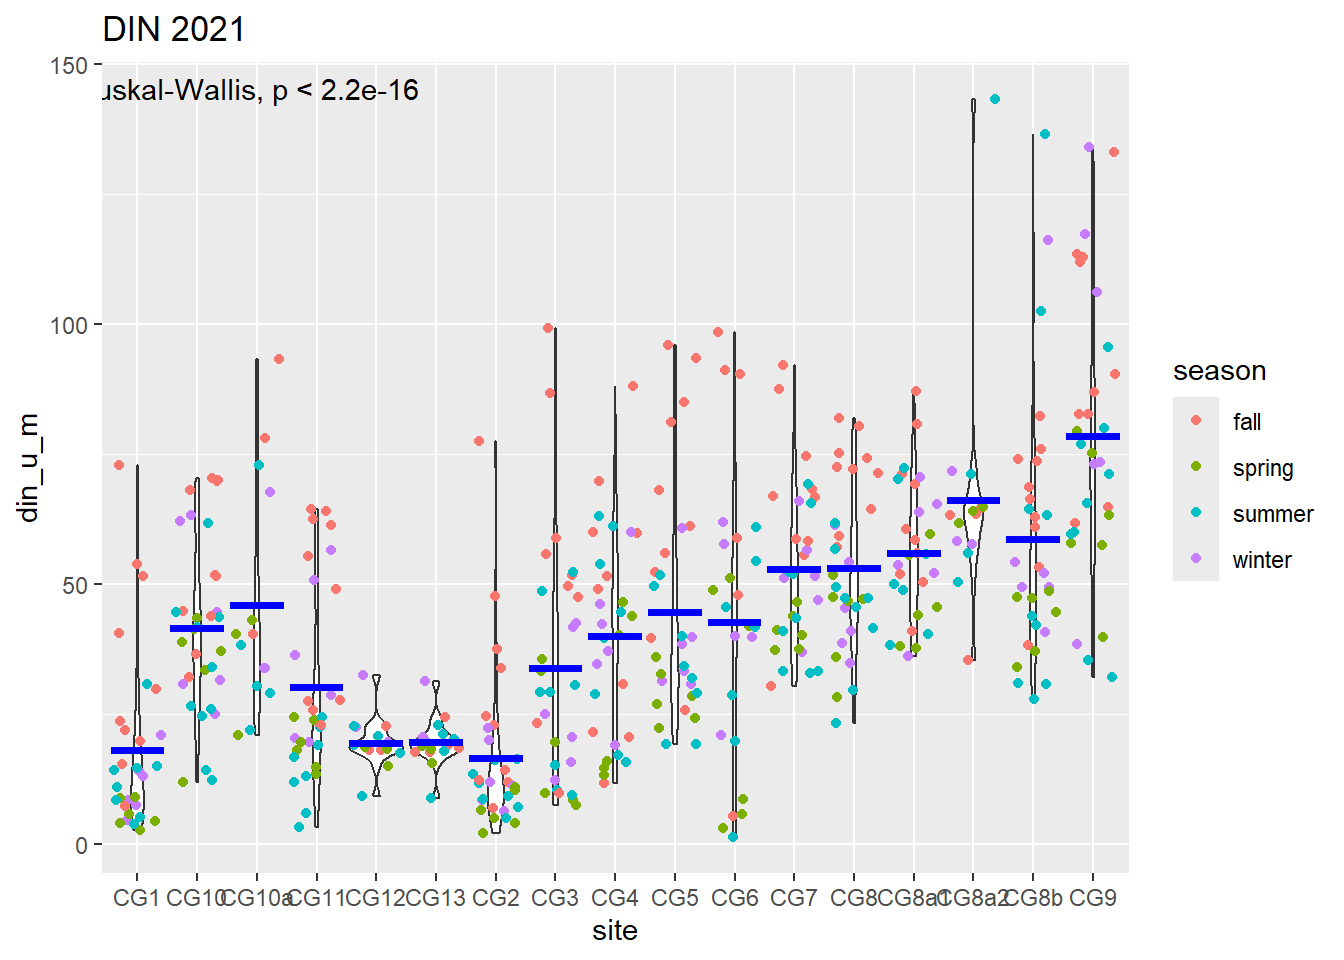

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

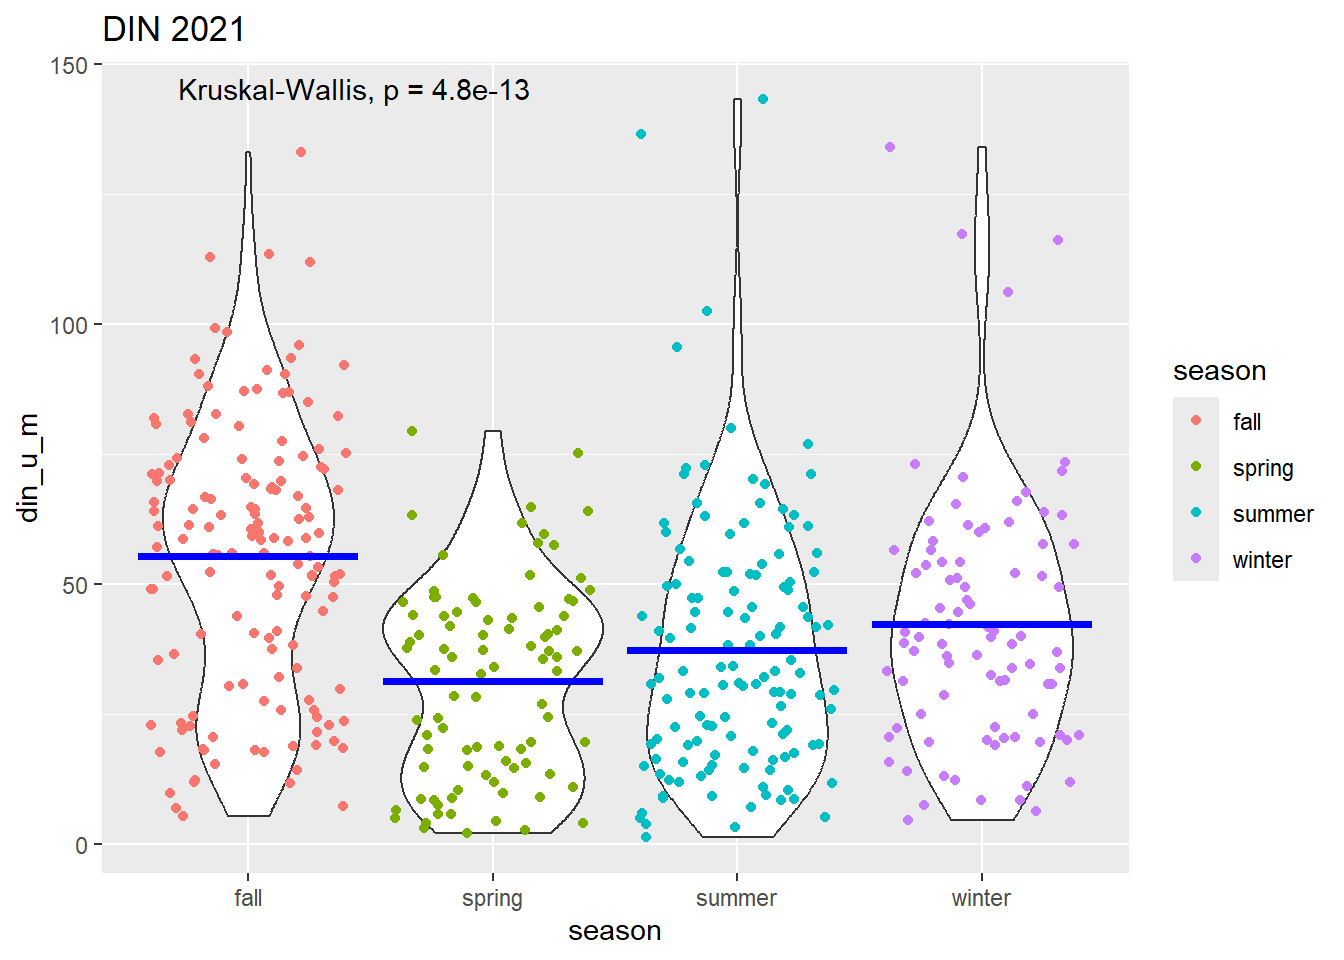

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

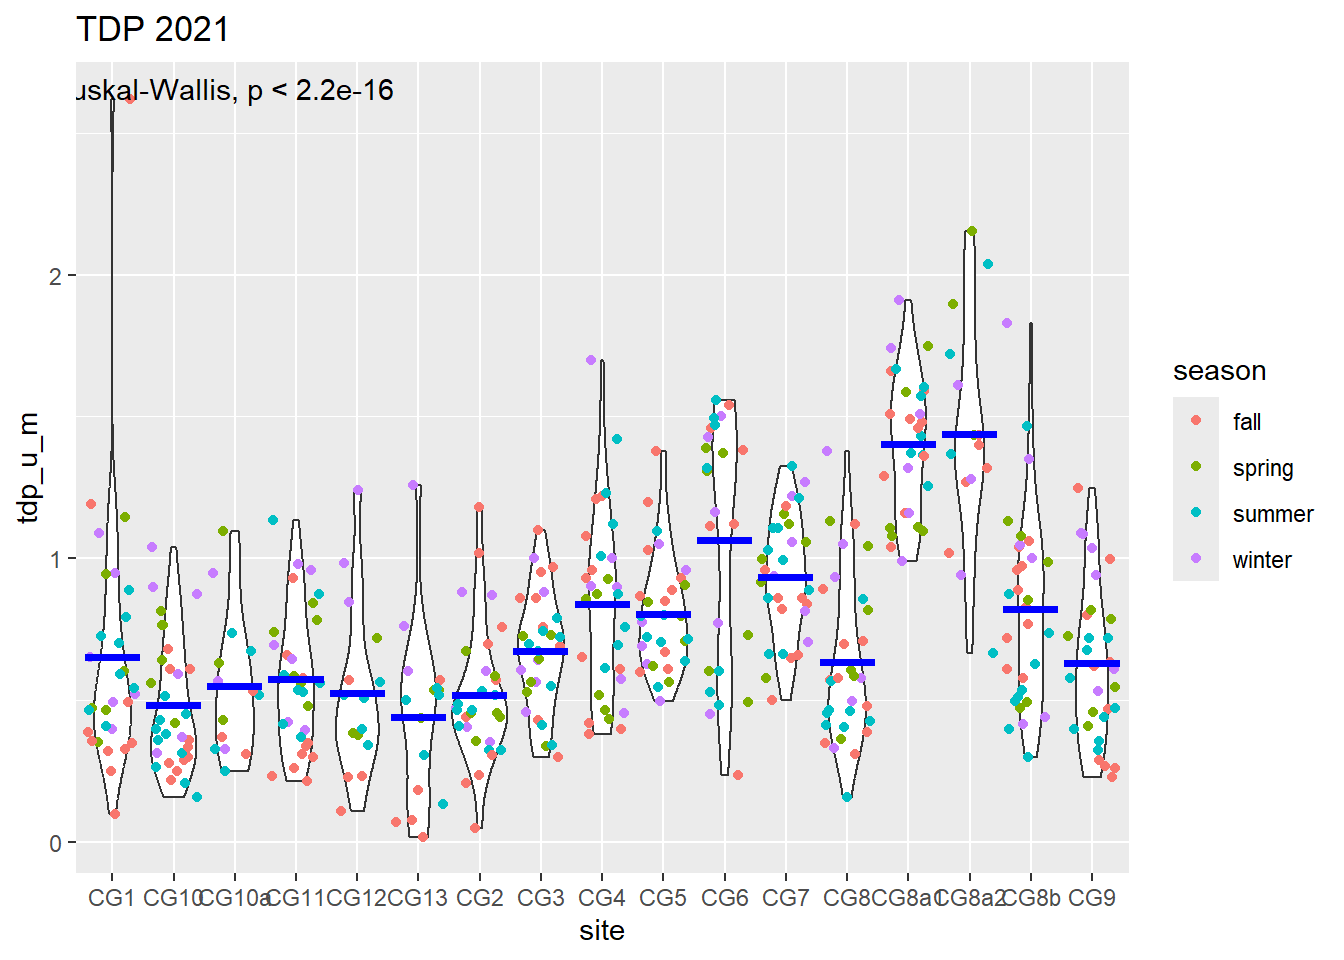

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

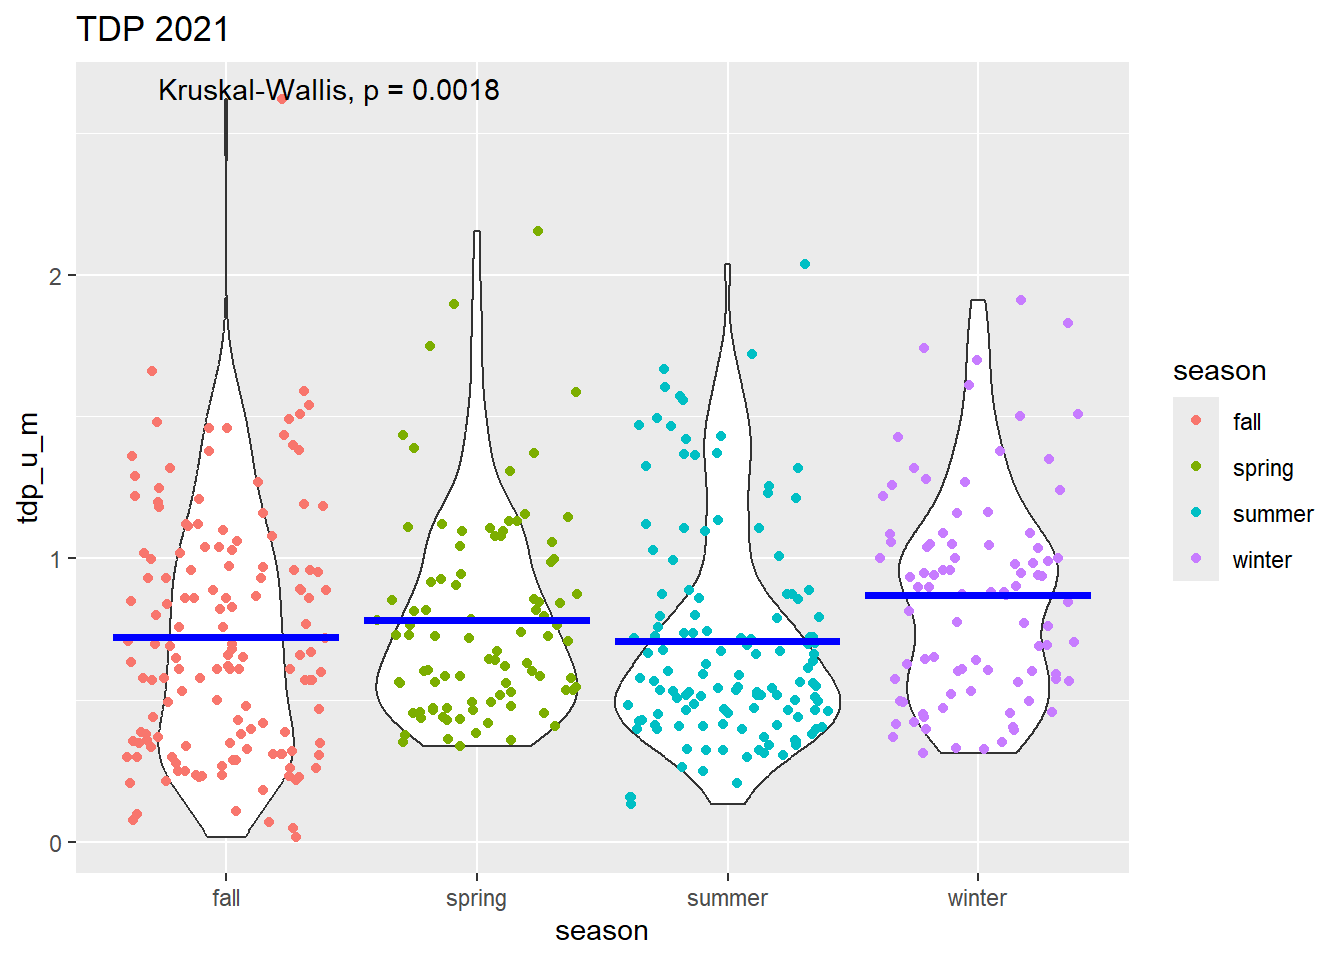

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

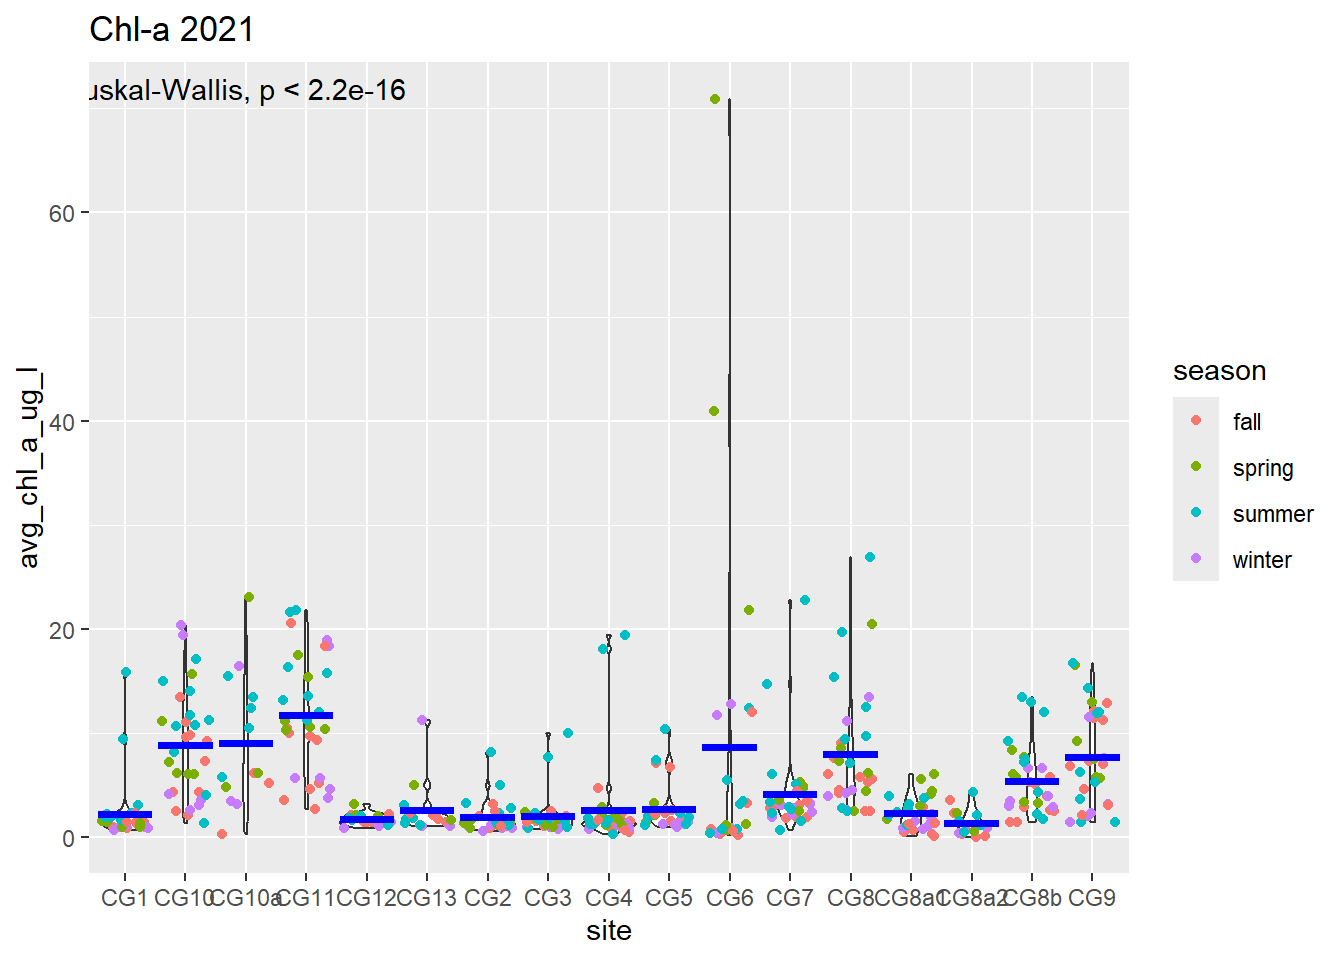

(`stat_ydensity()`).

(`stat_summary()`).

(`stat_compare_means()`).

(`geom_point()`).

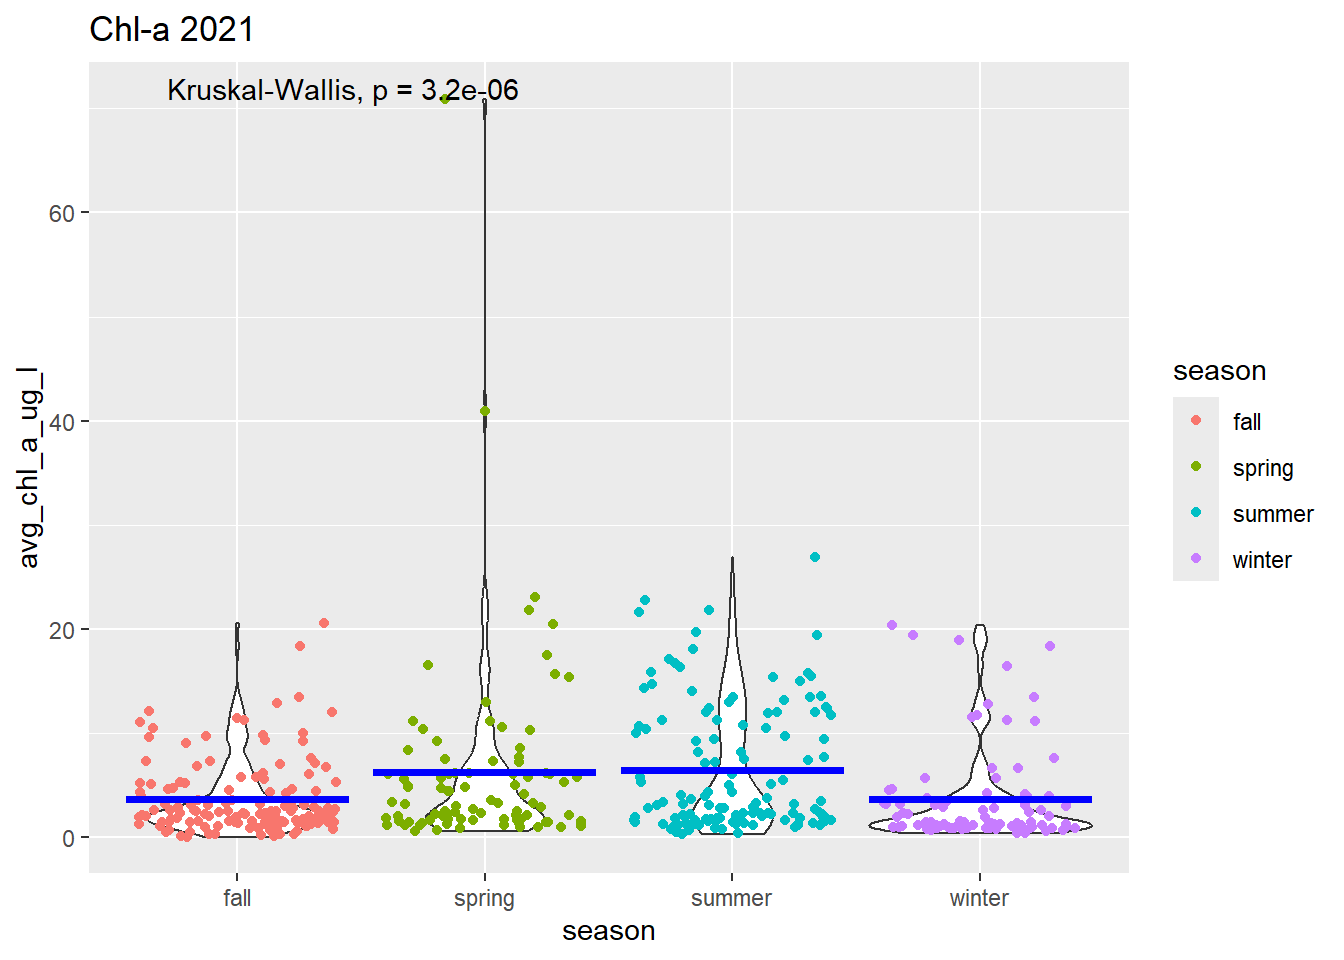

In [ ]:
ggplot(nutrients2021, aes(site, si_u_m)) +
  geom_violin()+
  geom_jitter(aes(color = season))+
  labs(title = "Silicates 2021")+
  stat_summary(fun = "mean",
               geom = "crossbar",
               color = "blue")


In [ ]:
iv <- nutrients2024 %>% select(air_temp_c, water_temp_c, do, salinity_ppt, p_h)
dv <- nutrients2024 %>% select(chl_a_lab_ug_l,pheophytin_ug_l)

cor_matrix <- cor(
  dv,
  iv,
  method = "spearman",
  use = "pairwise.complete.obs"
)

cor_matrix


                air_temp_c water_temp_c          do salinity_ppt        p_h
chl_a_lab_ug_l   0.2924866    0.2306167  0.01334189   -0.3706985 -0.2149279
pheophytin_ug_l  0.3495474    0.2070562 -0.07486871   -0.4842753 -0.2981405

In [ ]:

BiocManager::install("nondetects")
library(nondetects)
browseVignettes("nondetects")
library(HTqPCR)
browseVignettes("HTqPCR")
data("oncogene2013")
ls("package:HTqPCR")
?qpcrImpute

#Example data has a file that contains the names of the other 6 sample files.txt to read in
path <- system.file("exData", package = "HTqPCR")
files <- read.delim(file.path(path, "files.txt"))
raw <- readCtData(files = files$File, path = path)
show(raw)


#This is what one of the example files looks like
example_sample1<-(read.delim(file.path(path, "sample1.txt")))

#Ct overview of the example dataset
g <- featureNames(raw)[1:10]
plotCtOverview(raw, genes = g, xlim = c(0, 50), groups = files$Treatment, 
                 conf.int = TRUE, ylim = c(0, 55))

plotCtOverview(raw, genes = g, xlim = c(0, 50), groups = files$Treatment,
               calibrator = "Control")

?plotCtOverview
# Trying on my real data

e1a_set<- e1a2024 %>%
  rename(sample = samp_name) %>%
  rename(cq = quantificationCycle)


e1a_set <- readCTData(e1a_set, format = "SDS")


# Making one manually
ct_matrix <- e1a2024 %>%
  select(samp_name,assay_name, quantificationCycle) %>%
  pivot_wider(names_from = samp_name, values_from = quantificationCycle) %>%
  column_to_rownames("assay_name")

# Create the HTqPCR object manually
qPCR <- new("qPCRset", exprs = as.matrix(ct_matrix))
sampleNames(qPCR)

# Moving to qpcrImpute with package nondetects:
class(qPCR)
dim(exprs(qPCR))
head(exprs(qPCR))

featureNames(qPCR)


exprs(qPCR) <- as.matrix(exprs(qPCR))
rownames(exprs(qPCR)) <- featureNames(qPCR) <- "assay_1"  # give your assay a name

imputed <- qpcrImpute(
  qPCR
)

show(e1a_set)
fData(e1a_set)
e1a_set
?readCtData
plotCtOverview(e1a_set, genes=e1a, xlim=c(0,50), groups=files$Treatment, conf.int=TRUE,
ylim=c(0,55))

?readCtData
imputation_file<- "C:/Users/Robert.Bremer/Downloads/R_supplement.tar.gz"
supplement <- untar(imputation_file, list = TRUE)
supplement
view(supplement)


In [ ]:
# example lat long coordinates in EPSG 4326
simple_coords <- tibble::tibble(
  lat = -80.25,
  lon = 25.74
)

# convert coordinates to spatial feature
location_sf <- sf::st_as_sf(simple_coords,
                            coords = c("lat", "lon"),
                            crs = 4326) |>
  # make sure it's projected nicely for plotting
  sf::st_transform(crs = 5070)

location_sf <- st_transform(location_sf, 4269)

# add buffer
location_buffer <- sf::st_buffer(location_sf, 
                                 endCapStyle = "SQUARE",
                                 dist = 130000) # distance in meters

# query NHD for flowlines (non high resolution) in buffered area
location_nhd <- nhdplusTools::get_nhdplus(AOI = location_buffer, 
                                          realization = "flowline")


#?get_nhdplushr

location_nhd_wb <- nhdplusTools::get_waterbodies(AOI = location_buffer)

# default ggplot2 map
ggplot(data = location_nhd) +
  geom_sf() +
  geom_sf(data = location_nhd_wb) +
  geom_sf(data = location_sf, color = "white", fill = "black",
  shape = 21, stroke = 1, size = 3) 
  
# update map by adding nice colors and line thicknesses
ggplot() +
  # hydrolines: map stream order categories to factor labels
  geom_sf(
    data = location_nhd,
    aes(
      linewidth = factor(case_when(
        streamorde >= 5 ~ "major",   
        streamorde == 4 ~ "large",
        streamorde == 3 ~ "medium",
        TRUE ~ "small"))
      ),
    color = "blue") +
  # assign linewidth values using `scale_linewidth_manual()`
  scale_linewidth_manual(
    values = c(
      major = 0.3,
      large = 0.2,
      medium = 0.1,
      small = 0.04),
  # hide legend
    guide = "none") +
  # water bodies
  geom_sf(data = location_nhd_wb, color = "lightblue",
    fill  = "darkblue", linewidth = 0.01) +
  # dot in the middle for our main location of interest
  geom_sf(data = location_sf, color = "white", fill = "black",
  shape = 21, stroke = 1, size = 3) +
  theme_void()
